In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def load_images_and_labels(base_path):
    images = []
    labels = []
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize to normalize image size
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img)
            labels.append(int(folder))  # Assuming folder names are 0-9
    images = np.array(images) / 255.0  # Normalize pixel values
    images = images.reshape(-1, 64, 64, 1)  # Reshape for CNN input
    labels = to_categorical(labels, num_classes=10)  # One-hot encode labels
    return images, labels

# Path to your dataset
base_path = 'C:/cards'
images, labels = load_images_and_labels(base_path)
print(len(images),len(labels))

30250 30250


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\moune\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
history = model.fit(images, labels, epochs=20, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.4213 - loss: 1.5301 - val_accuracy: 0.0083 - val_loss: 14.2355
Epoch 2/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8933 - loss: 0.2880 - val_accuracy: 0.0083 - val_loss: 18.5771
Epoch 3/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9344 - loss: 0.1671 - val_accuracy: 0.0083 - val_loss: 22.5230
Epoch 4/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9439 - loss: 0.1365 - val_accuracy: 0.0083 - val_loss: 22.9707
Epoch 5/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9513 - loss: 0.1136 - val_accuracy: 0.0083 - val_loss: 26.9446
Epoch 6/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9579 - loss: 0.0953 - val_accuracy: 0.0083 - val_loss: 24.4199
Epoch 7/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9668 - loss: 0.0787 - val_accuracy: 0.0083 - val_loss: 27.4170
Epoch 8/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9670 - loss: 0.

In [5]:
test_base_path = 'C:/cards'  # Update this path to where your test data is located
test_images, test_labels = load_images_and_labels(test_base_path)

In [6]:
# Load the model
model = load_model('best_model.keras')

In [7]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9717 - loss: 0.3783
Test loss: 2.917299270629883
Test accuracy: 0.7937520742416382


In [8]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(test_labels, axis=1)

# Display some predictions
for i in range(10):  # Show first 10 predictions
    print(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")

946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


In [9]:
cm = confusion_matrix(actual_classes, predicted_classes)
print(cm)

report = classification_report(actual_classes, predicted_classes)
print(report)

[[3235   15    0    0    0    0    0    0    0    0]
 [   2 2998    0    0    0    0    0    0    0    0]
 [   0    2 2998    0    0    0    0    0    0    0]
 [   1    6   23 2919   51    0    0    0    0    0]
 [   0    0    1    0 2986    5    0    8    0    0]
 [   3    0    0    0    1 2951    2   43    0    0]
 [   0    0    0    0   43    8 2943    6    0    0]
 [   0    0    0    0    3   14    2 2981    0    0]
 [ 756   18   40   22  154  539  517  954    0    0]
 [  49    8    0   60  385 1027  921  550    0    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3250
           1       0.98      1.00      0.99      3000
           2       0.98      1.00      0.99      3000
           3       0.97      0.97      0.97      3000
           4       0.82      1.00      0.90      3000
           5       0.65      0.98      0.78      3000
           6       0.67      0.98      0.80      3000
           7       0.66      0.99   

C:\Users\moune\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moune\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moune\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Generate a classification report
report = classification_report(actual_classes, predicted_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3250
           1       0.98      1.00      0.99      3000
           2       0.98      1.00      0.99      3000
           3       0.97      0.97      0.97      3000
           4       0.82      1.00      0.90      3000
           5       0.65      0.98      0.78      3000
           6       0.67      0.98      0.80      3000
           7       0.66      0.99      0.79      3000
           8       0.00      0.00      0.00      3000
           9       0.00      0.00      0.00      3000

    accuracy                           0.79     30250
   macro avg       0.65      0.79      0.71     30250
weighted avg       0.65      0.79      0.71     30250



C:\Users\moune\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moune\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moune\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


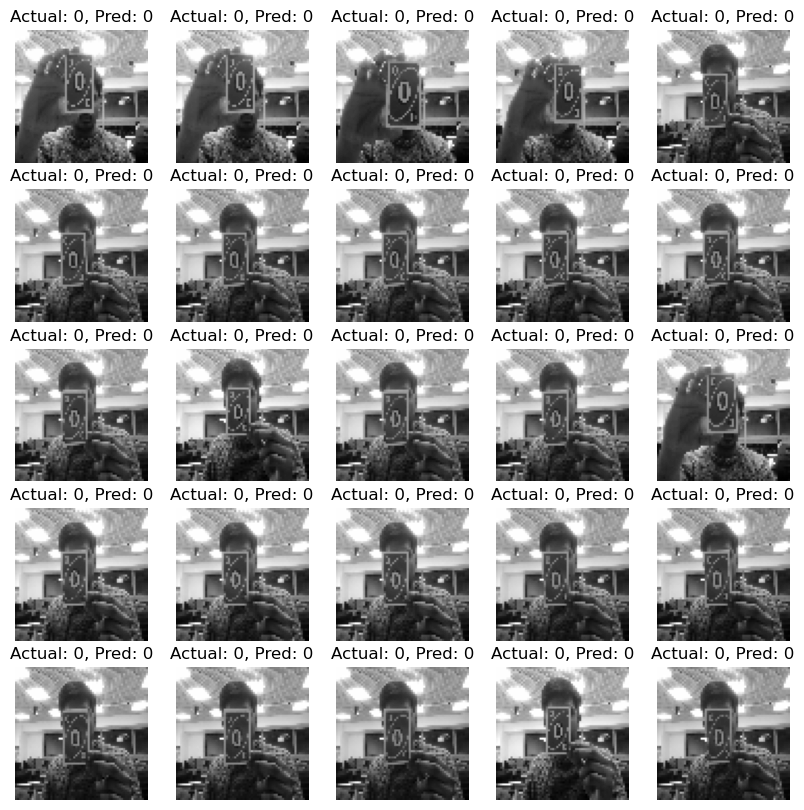

In [11]:
def plot_images(images, actuals, preds):
    plt.figure(figsize=(10, 10))
    for i in range(25):  # adjust this number based on how many images you want to show
        ax = plt.subplot(5, 5, i + 1)  # adjust the grid size accordingly
        plt.imshow(images[i].reshape(64, 64), cmap='gray')  # adjust the shape based on your actual image dimensions
        plt.title(f"Actual: {actuals[i]}, Pred: {preds[i]}")
        plt.axis('off')
    plt.show()

# Call the function with the appropriate arrays
plot_images(test_images, actual_classes, predicted_classes)

In [12]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to match the input size of the model (e.g., 64x64)
    img = cv2.resize(img, (64, 64))
    # Convert to grayscale if the model was trained on grayscale images
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Normalize pixel values to [0, 1]
    img = img / 255.0
    # Reshape the image to fit the model input (e.g., (1, 64, 64, 1) for a single grayscale image)
    img = img.reshape(1, 64, 64, 1)
    return img

In [13]:
model = load_model('best_model.keras')

In [14]:
def predict_image(model, image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    # Predict the class
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    return predicted_class

In [15]:
image_path = 'C:/cards/3/1.png'
predicted_class = predict_image(model, image_path)
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: 3


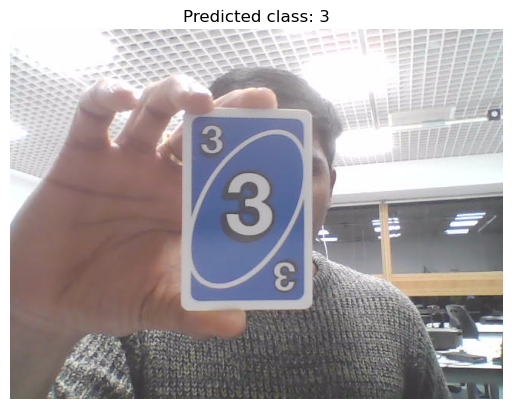

In [16]:
def display_image_with_prediction(image_path, predicted_class):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis('off')
    plt.show()

# Display the image with its prediction
display_image_with_prediction(image_path, predicted_class)

In [17]:
def detect_hsv_color(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))  # Optional: Resize to reduce computation

    # Convert to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Histogram in HSV (focusing only on the hue channel for simplicity)
    # You might want to consider other channels depending on your specific needs
    hue_hist = cv2.calcHist([hsv_img], [0], None, [180], [0, 180])
    dominant_hue = np.argmax(hue_hist)
    print(dominant_hue)

    # Map the dominant hue to a color name
    color = "undefined"
    if dominant_hue < 30:
        color = "red"
    elif 50 <= dominant_hue < 60:
        color = "yellow"
    elif 80 <= dominant_hue < 150:
        color = "green"
    elif 200 <= dominant_hue < 250:
        color = "blue"
    else:
        color = "red"  # Wrapping around the hue circle

    return color


In [18]:
def process_images_for_color(base_path):
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            dominant_color = detect_hsv_color(file_path)
            print(f"{file}: Dominant Color - {dominant_color}")

base_path = 'C:/cards'
process_images_for_color(base_path)

150
0.png: Dominant Color - red
150
1.png: Dominant Color - red
150
10.png: Dominant Color - red
150
100.png: Dominant Color - red
150
1000.png: Dominant Color - red
150
1001.png: Dominant Color - red
150
1002.png: Dominant Color - red
150
1003.png: Dominant Color - red
150
1004.png: Dominant Color - red
150
1005.png: Dominant Color - red
150
1006.png: Dominant Color - red
150
1007.png: Dominant Color - red
150
1008.png: Dominant Color - red
150
1009.png: Dominant Color - red
150
101.png: Dominant Color - red
150
1010.png: Dominant Color - red
150
1011.png: Dominant Color - red
150
1012.png: Dominant Color - red
150
1013.png: Dominant Color - red
150
1014.png: Dominant Color - red
150
1015.png: Dominant Color - red
150
1016.png: Dominant Color - red
150
1017.png: Dominant Color - red
150
1018.png: Dominant Color - red
150
1019.png: Dominant Color - red
150
102.png: Dominant Color - red
150
1020.png: Dominant Color - red
150
1021.png: Dominant Color - red
150
1022.png: Dominant Color - 

150
1227.png: Dominant Color - red
150
1228.png: Dominant Color - red
150
1229.png: Dominant Color - red
150
123.png: Dominant Color - red
150
1230.png: Dominant Color - red
150
1231.png: Dominant Color - red
150
1232.png: Dominant Color - red
150
1233.png: Dominant Color - red
150
1234.png: Dominant Color - red
150
1235.png: Dominant Color - red
150
1236.png: Dominant Color - red
150
1237.png: Dominant Color - red
150
1238.png: Dominant Color - red
150
1239.png: Dominant Color - red
150
124.png: Dominant Color - red
150
1240.png: Dominant Color - red
150
1241.png: Dominant Color - red
150
1242.png: Dominant Color - red
150
1243.png: Dominant Color - red
150
1244.png: Dominant Color - red
150
1245.png: Dominant Color - red
150
1246.png: Dominant Color - red
150
1247.png: Dominant Color - red
150
1248.png: Dominant Color - red
150
1249.png: Dominant Color - red
150
125.png: Dominant Color - red
150
1250.png: Dominant Color - red
150
1251.png: Dominant Color - red
150
1252.png: Dominant 

150
146.png: Dominant Color - red
150
1460.png: Dominant Color - red
150
1461.png: Dominant Color - red
150
1462.png: Dominant Color - red
150
1463.png: Dominant Color - red
150
1464.png: Dominant Color - red
150
1465.png: Dominant Color - red
150
1466.png: Dominant Color - red
150
1467.png: Dominant Color - red
150
1468.png: Dominant Color - red
150
1469.png: Dominant Color - red
150
147.png: Dominant Color - red
150
1470.png: Dominant Color - red
150
1471.png: Dominant Color - red
150
1472.png: Dominant Color - red
150
1473.png: Dominant Color - red
150
1474.png: Dominant Color - red
150
1475.png: Dominant Color - red
150
1476.png: Dominant Color - red
150
1477.png: Dominant Color - red
150
1478.png: Dominant Color - red
150
1479.png: Dominant Color - red
150
148.png: Dominant Color - red
150
1480.png: Dominant Color - red
150
1481.png: Dominant Color - red
150
1482.png: Dominant Color - red
150
1483.png: Dominant Color - red
150
1484.png: Dominant Color - red
150
1485.png: Dominant 

150
1694.png: Dominant Color - red
150
1695.png: Dominant Color - red
150
1696.png: Dominant Color - red
150
1697.png: Dominant Color - red
150
1698.png: Dominant Color - red
150
1699.png: Dominant Color - red
150
17.png: Dominant Color - red
150
170.png: Dominant Color - red
150
1700.png: Dominant Color - red
150
1701.png: Dominant Color - red
150
1702.png: Dominant Color - red
150
1703.png: Dominant Color - red
150
1704.png: Dominant Color - red
150
1705.png: Dominant Color - red
150
1706.png: Dominant Color - red
150
1707.png: Dominant Color - red
150
1708.png: Dominant Color - red
150
1709.png: Dominant Color - red
150
171.png: Dominant Color - red
150
1710.png: Dominant Color - red
150
1711.png: Dominant Color - red
150
1712.png: Dominant Color - red
150
1713.png: Dominant Color - red
150
1714.png: Dominant Color - red
150
1715.png: Dominant Color - red
150
1716.png: Dominant Color - red
150
1717.png: Dominant Color - red
150
1718.png: Dominant Color - red
150
1719.png: Dominant C

150
192.png: Dominant Color - red
150
1920.png: Dominant Color - red
150
1921.png: Dominant Color - red
150
1922.png: Dominant Color - red
150
1923.png: Dominant Color - red
150
1924.png: Dominant Color - red
150
1925.png: Dominant Color - red
150
1926.png: Dominant Color - red
150
1927.png: Dominant Color - red
150
1928.png: Dominant Color - red
150
1929.png: Dominant Color - red
150
193.png: Dominant Color - red
150
1930.png: Dominant Color - red
150
1931.png: Dominant Color - red
150
1932.png: Dominant Color - red
150
1933.png: Dominant Color - red
150
1934.png: Dominant Color - red
150
1935.png: Dominant Color - red
150
1936.png: Dominant Color - red
150
1937.png: Dominant Color - red
150
1938.png: Dominant Color - red
150
1939.png: Dominant Color - red
150
194.png: Dominant Color - red
150
1940.png: Dominant Color - red
150
1941.png: Dominant Color - red
150
1942.png: Dominant Color - red
150
1943.png: Dominant Color - red
150
1944.png: Dominant Color - red
150
1945.png: Dominant 

150
2152.png: Dominant Color - red
150
2153.png: Dominant Color - red
150
2154.png: Dominant Color - red
150
2155.png: Dominant Color - red
150
2156.png: Dominant Color - red
150
2157.png: Dominant Color - red
150
2158.png: Dominant Color - red
150
2159.png: Dominant Color - red
150
216.png: Dominant Color - red
150
2160.png: Dominant Color - red
150
2161.png: Dominant Color - red
150
2162.png: Dominant Color - red
150
2163.png: Dominant Color - red
150
2164.png: Dominant Color - red
150
2165.png: Dominant Color - red
150
2166.png: Dominant Color - red
150
2167.png: Dominant Color - red
150
2168.png: Dominant Color - red
150
2169.png: Dominant Color - red
150
217.png: Dominant Color - red
150
2170.png: Dominant Color - red
150
2171.png: Dominant Color - red
150
2172.png: Dominant Color - red
150
2173.png: Dominant Color - red
150
2174.png: Dominant Color - red
150
2175.png: Dominant Color - red
150
2176.png: Dominant Color - red
150
2177.png: Dominant Color - red
150
2178.png: Dominant

150
2393.png: Dominant Color - red
150
2394.png: Dominant Color - red
150
2395.png: Dominant Color - red
150
2396.png: Dominant Color - red
150
2397.png: Dominant Color - red
150
2398.png: Dominant Color - red
150
2399.png: Dominant Color - red
150
24.png: Dominant Color - red
150
240.png: Dominant Color - red
150
2400.png: Dominant Color - red
150
2401.png: Dominant Color - red
150
2402.png: Dominant Color - red
150
2403.png: Dominant Color - red
150
2404.png: Dominant Color - red
150
2405.png: Dominant Color - red
150
2406.png: Dominant Color - red
150
2407.png: Dominant Color - red
150
2408.png: Dominant Color - red
150
2409.png: Dominant Color - red
150
241.png: Dominant Color - red
150
2410.png: Dominant Color - red
150
2411.png: Dominant Color - red
150
2412.png: Dominant Color - red
150
2413.png: Dominant Color - red
150
2414.png: Dominant Color - red
150
2415.png: Dominant Color - red
150
2416.png: Dominant Color - red
150
2417.png: Dominant Color - red
150
2418.png: Dominant C

150
2621.png: Dominant Color - red
150
2622.png: Dominant Color - red
150
2623.png: Dominant Color - red
150
2624.png: Dominant Color - red
150
2625.png: Dominant Color - red
150
2626.png: Dominant Color - red
150
2627.png: Dominant Color - red
150
2628.png: Dominant Color - red
150
2629.png: Dominant Color - red
150
263.png: Dominant Color - red
150
2630.png: Dominant Color - red
150
2631.png: Dominant Color - red
150
2632.png: Dominant Color - red
150
2633.png: Dominant Color - red
150
2634.png: Dominant Color - red
150
2635.png: Dominant Color - red
150
2636.png: Dominant Color - red
150
2637.png: Dominant Color - red
150
2638.png: Dominant Color - red
150
2639.png: Dominant Color - red
150
264.png: Dominant Color - red
150
2640.png: Dominant Color - red
150
2641.png: Dominant Color - red
150
2642.png: Dominant Color - red
150
2643.png: Dominant Color - red
150
2644.png: Dominant Color - red
150
2645.png: Dominant Color - red
150
2646.png: Dominant Color - red
150
2647.png: Dominant

150
286.png: Dominant Color - red
150
2860.png: Dominant Color - red
150
2861.png: Dominant Color - red
150
2862.png: Dominant Color - red
150
2863.png: Dominant Color - red
150
2864.png: Dominant Color - red
150
2865.png: Dominant Color - red
150
2866.png: Dominant Color - red
150
2867.png: Dominant Color - red
150
2868.png: Dominant Color - red
150
2869.png: Dominant Color - red
150
287.png: Dominant Color - red
150
2870.png: Dominant Color - red
150
2871.png: Dominant Color - red
150
2872.png: Dominant Color - red
150
2873.png: Dominant Color - red
150
2874.png: Dominant Color - red
150
2875.png: Dominant Color - red
150
2876.png: Dominant Color - red
150
2877.png: Dominant Color - red
150
2878.png: Dominant Color - red
150
2879.png: Dominant Color - red
150
288.png: Dominant Color - red
150
2880.png: Dominant Color - red
150
2881.png: Dominant Color - red
150
2882.png: Dominant Color - red
150
2883.png: Dominant Color - red
150
2884.png: Dominant Color - red
150
2885.png: Dominant 

150
3095.png: Dominant Color - red
150
3096.png: Dominant Color - red
150
3097.png: Dominant Color - red
150
3098.png: Dominant Color - red
150
3099.png: Dominant Color - red
150
31.png: Dominant Color - red
150
310.png: Dominant Color - red
150
3100.png: Dominant Color - red
150
3101.png: Dominant Color - red
150
3102.png: Dominant Color - red
150
3103.png: Dominant Color - red
150
3104.png: Dominant Color - red
150
3105.png: Dominant Color - red
150
3106.png: Dominant Color - red
150
3107.png: Dominant Color - red
150
3108.png: Dominant Color - red
150
3109.png: Dominant Color - red
150
311.png: Dominant Color - red
150
3110.png: Dominant Color - red
150
3111.png: Dominant Color - red
150
3112.png: Dominant Color - red
150
3113.png: Dominant Color - red
150
3114.png: Dominant Color - red
150
3115.png: Dominant Color - red
150
3116.png: Dominant Color - red
150
3117.png: Dominant Color - red
150
3118.png: Dominant Color - red
150
3119.png: Dominant Color - red
150
312.png: Dominant Co

150
399.png: Dominant Color - red
150
4.png: Dominant Color - red
150
40.png: Dominant Color - red
150
400.png: Dominant Color - red
150
401.png: Dominant Color - red
150
402.png: Dominant Color - red
150
403.png: Dominant Color - red
150
404.png: Dominant Color - red
150
405.png: Dominant Color - red
150
406.png: Dominant Color - red
150
407.png: Dominant Color - red
150
408.png: Dominant Color - red
150
409.png: Dominant Color - red
150
41.png: Dominant Color - red
150
410.png: Dominant Color - red
150
411.png: Dominant Color - red
150
412.png: Dominant Color - red
150
413.png: Dominant Color - red
150
414.png: Dominant Color - red
150
415.png: Dominant Color - red
150
416.png: Dominant Color - red
150
417.png: Dominant Color - red
150
418.png: Dominant Color - red
150
419.png: Dominant Color - red
150
42.png: Dominant Color - red
150
420.png: Dominant Color - red
150
421.png: Dominant Color - red
150
422.png: Dominant Color - red
150
423.png: Dominant Color - red
150
424.png: Domina

150
618.png: Dominant Color - red
150
619.png: Dominant Color - red
150
62.png: Dominant Color - red
150
620.png: Dominant Color - red
150
621.png: Dominant Color - red
150
622.png: Dominant Color - red
150
623.png: Dominant Color - red
150
624.png: Dominant Color - red
150
625.png: Dominant Color - red
150
626.png: Dominant Color - red
150
627.png: Dominant Color - red
150
628.png: Dominant Color - red
150
629.png: Dominant Color - red
150
63.png: Dominant Color - red
150
630.png: Dominant Color - red
150
631.png: Dominant Color - red
150
632.png: Dominant Color - red
150
633.png: Dominant Color - red
150
634.png: Dominant Color - red
150
635.png: Dominant Color - red
150
636.png: Dominant Color - red
150
637.png: Dominant Color - red
150
638.png: Dominant Color - red
150
639.png: Dominant Color - red
150
64.png: Dominant Color - red
150
640.png: Dominant Color - red
150
641.png: Dominant Color - red
150
642.png: Dominant Color - red
150
643.png: Dominant Color - red
150
644.png: Domi

150
850.png: Dominant Color - red
30
851.png: Dominant Color - red
150
852.png: Dominant Color - red
150
853.png: Dominant Color - red
150
854.png: Dominant Color - red
150
855.png: Dominant Color - red
150
856.png: Dominant Color - red
150
857.png: Dominant Color - red
150
858.png: Dominant Color - red
150
859.png: Dominant Color - red
150
86.png: Dominant Color - red
150
860.png: Dominant Color - red
150
861.png: Dominant Color - red
150
862.png: Dominant Color - red
150
863.png: Dominant Color - red
150
864.png: Dominant Color - red
150
865.png: Dominant Color - red
150
866.png: Dominant Color - red
150
867.png: Dominant Color - red
150
868.png: Dominant Color - red
150
869.png: Dominant Color - red
150
87.png: Dominant Color - red
150
870.png: Dominant Color - red
150
871.png: Dominant Color - red
150
872.png: Dominant Color - red
150
873.png: Dominant Color - red
150
874.png: Dominant Color - red
150
875.png: Dominant Color - red
150
876.png: Dominant Color - red
150
877.png: Domi

150
1081.png: Dominant Color - red
150
1082.png: Dominant Color - red
150
1083.png: Dominant Color - red
150
1084.png: Dominant Color - red
150
1085.png: Dominant Color - red
150
1086.png: Dominant Color - red
150
1087.png: Dominant Color - red
150
1088.png: Dominant Color - red
150
1089.png: Dominant Color - red
150
109.png: Dominant Color - red
150
1090.png: Dominant Color - red
150
1091.png: Dominant Color - red
150
1092.png: Dominant Color - red
150
1093.png: Dominant Color - red
150
1094.png: Dominant Color - red
150
1095.png: Dominant Color - red
150
1096.png: Dominant Color - red
150
1097.png: Dominant Color - red
150
1098.png: Dominant Color - red
150
1099.png: Dominant Color - red
150
11.png: Dominant Color - red
150
110.png: Dominant Color - red
150
1100.png: Dominant Color - red
150
1101.png: Dominant Color - red
150
1102.png: Dominant Color - red
150
1103.png: Dominant Color - red
150
1104.png: Dominant Color - red
150
1105.png: Dominant Color - red
150
1106.png: Dominant C

150
1311.png: Dominant Color - red
150
1312.png: Dominant Color - red
150
1313.png: Dominant Color - red
150
1314.png: Dominant Color - red
150
1315.png: Dominant Color - red
150
1316.png: Dominant Color - red
150
1317.png: Dominant Color - red
150
1318.png: Dominant Color - red
150
1319.png: Dominant Color - red
150
132.png: Dominant Color - red
150
1320.png: Dominant Color - red
150
1321.png: Dominant Color - red
150
1322.png: Dominant Color - red
150
1323.png: Dominant Color - red
150
1324.png: Dominant Color - red
150
1325.png: Dominant Color - red
150
1326.png: Dominant Color - red
150
1327.png: Dominant Color - red
150
1328.png: Dominant Color - red
150
1329.png: Dominant Color - red
150
133.png: Dominant Color - red
150
1330.png: Dominant Color - red
150
1331.png: Dominant Color - red
150
1332.png: Dominant Color - red
150
1333.png: Dominant Color - red
150
1334.png: Dominant Color - red
150
1335.png: Dominant Color - red
150
1336.png: Dominant Color - red
150
1337.png: Dominant

150
1534.png: Dominant Color - red
150
1535.png: Dominant Color - red
150
1536.png: Dominant Color - red
150
1537.png: Dominant Color - red
150
1538.png: Dominant Color - red
150
1539.png: Dominant Color - red
150
154.png: Dominant Color - red
150
1540.png: Dominant Color - red
150
1541.png: Dominant Color - red
150
1542.png: Dominant Color - red
150
1543.png: Dominant Color - red
150
1544.png: Dominant Color - red
150
1545.png: Dominant Color - red
150
1546.png: Dominant Color - red
150
1547.png: Dominant Color - red
150
1548.png: Dominant Color - red
150
1549.png: Dominant Color - red
150
155.png: Dominant Color - red
150
1550.png: Dominant Color - red
150
1551.png: Dominant Color - red
150
1552.png: Dominant Color - red
150
1553.png: Dominant Color - red
150
1554.png: Dominant Color - red
150
1555.png: Dominant Color - red
150
1556.png: Dominant Color - red
150
1557.png: Dominant Color - red
150
1558.png: Dominant Color - red
150
1559.png: Dominant Color - red
150
156.png: Dominant 

150
1765.png: Dominant Color - red
150
1766.png: Dominant Color - red
150
1767.png: Dominant Color - red
150
1768.png: Dominant Color - red
150
1769.png: Dominant Color - red
150
177.png: Dominant Color - red
150
1770.png: Dominant Color - red
150
1771.png: Dominant Color - red
150
1772.png: Dominant Color - red
150
1773.png: Dominant Color - red
150
1774.png: Dominant Color - red
150
1775.png: Dominant Color - red
150
1776.png: Dominant Color - red
150
1777.png: Dominant Color - red
150
1778.png: Dominant Color - red
150
1779.png: Dominant Color - red
150
178.png: Dominant Color - red
150
1780.png: Dominant Color - red
150
1781.png: Dominant Color - red
150
1782.png: Dominant Color - red
150
1783.png: Dominant Color - red
150
1784.png: Dominant Color - red
150
1785.png: Dominant Color - red
150
1786.png: Dominant Color - red
150
1787.png: Dominant Color - red
150
1788.png: Dominant Color - red
150
1789.png: Dominant Color - red
150
179.png: Dominant Color - red
150
1790.png: Dominant 

150
200.png: Dominant Color - red
150
2000.png: Dominant Color - red
150
2001.png: Dominant Color - red
150
2002.png: Dominant Color - red
150
2003.png: Dominant Color - red
150
2004.png: Dominant Color - red
150
2005.png: Dominant Color - red
150
2006.png: Dominant Color - red
150
2007.png: Dominant Color - red
150
2008.png: Dominant Color - red
150
2009.png: Dominant Color - red
150
201.png: Dominant Color - red
150
2010.png: Dominant Color - red
150
2011.png: Dominant Color - red
150
2012.png: Dominant Color - red
150
2013.png: Dominant Color - red
150
2014.png: Dominant Color - red
150
2015.png: Dominant Color - red
150
2016.png: Dominant Color - red
150
2017.png: Dominant Color - red
150
2018.png: Dominant Color - red
150
2019.png: Dominant Color - red
150
202.png: Dominant Color - red
150
2020.png: Dominant Color - red
150
2021.png: Dominant Color - red
150
2022.png: Dominant Color - red
150
2023.png: Dominant Color - red
150
2024.png: Dominant Color - red
150
2025.png: Dominant 

150
2233.png: Dominant Color - red
150
2234.png: Dominant Color - red
150
2235.png: Dominant Color - red
150
2236.png: Dominant Color - red
150
2237.png: Dominant Color - red
150
2238.png: Dominant Color - red
150
2239.png: Dominant Color - red
150
224.png: Dominant Color - red
150
2240.png: Dominant Color - red
150
2241.png: Dominant Color - red
150
2242.png: Dominant Color - red
150
2243.png: Dominant Color - red
150
2244.png: Dominant Color - red
150
2245.png: Dominant Color - red
150
2246.png: Dominant Color - red
150
2247.png: Dominant Color - red
150
2248.png: Dominant Color - red
150
2249.png: Dominant Color - red
150
225.png: Dominant Color - red
150
2250.png: Dominant Color - red
150
2251.png: Dominant Color - red
150
2252.png: Dominant Color - red
150
2253.png: Dominant Color - red
150
2254.png: Dominant Color - red
150
2255.png: Dominant Color - red
150
2256.png: Dominant Color - red
150
2257.png: Dominant Color - red
150
2258.png: Dominant Color - red
150
2259.png: Dominant

150
2472.png: Dominant Color - red
150
2473.png: Dominant Color - red
150
2474.png: Dominant Color - red
150
2475.png: Dominant Color - red
150
2476.png: Dominant Color - red
150
2477.png: Dominant Color - red
150
2478.png: Dominant Color - red
150
2479.png: Dominant Color - red
150
248.png: Dominant Color - red
150
2480.png: Dominant Color - red
150
2481.png: Dominant Color - red
150
2482.png: Dominant Color - red
150
2483.png: Dominant Color - red
150
2484.png: Dominant Color - red
150
2485.png: Dominant Color - red
150
2486.png: Dominant Color - red
150
2487.png: Dominant Color - red
150
2488.png: Dominant Color - red
150
2489.png: Dominant Color - red
150
249.png: Dominant Color - red
150
2490.png: Dominant Color - red
150
2491.png: Dominant Color - red
150
2492.png: Dominant Color - red
150
2493.png: Dominant Color - red
150
2494.png: Dominant Color - red
150
2495.png: Dominant Color - red
150
2496.png: Dominant Color - red
150
2497.png: Dominant Color - red
150
2498.png: Dominant

150
2697.png: Dominant Color - red
150
2698.png: Dominant Color - red
150
2699.png: Dominant Color - red
150
27.png: Dominant Color - red
150
270.png: Dominant Color - red
150
2700.png: Dominant Color - red
150
2701.png: Dominant Color - red
150
2702.png: Dominant Color - red
150
2703.png: Dominant Color - red
150
2704.png: Dominant Color - red
150
2705.png: Dominant Color - red
150
2706.png: Dominant Color - red
150
2707.png: Dominant Color - red
150
2708.png: Dominant Color - red
150
2709.png: Dominant Color - red
150
271.png: Dominant Color - red
150
2710.png: Dominant Color - red
150
2711.png: Dominant Color - red
150
2712.png: Dominant Color - red
150
2713.png: Dominant Color - red
150
2714.png: Dominant Color - red
150
2715.png: Dominant Color - red
150
2716.png: Dominant Color - red
150
2717.png: Dominant Color - red
150
2718.png: Dominant Color - red
150
2719.png: Dominant Color - red
150
272.png: Dominant Color - red
150
2720.png: Dominant Color - red
150
2721.png: Dominant Co

150
2937.png: Dominant Color - red
150
2938.png: Dominant Color - red
150
2939.png: Dominant Color - red
150
294.png: Dominant Color - red
150
2940.png: Dominant Color - red
150
2941.png: Dominant Color - red
150
2942.png: Dominant Color - red
150
2943.png: Dominant Color - red
150
2944.png: Dominant Color - red
150
2945.png: Dominant Color - red
150
2946.png: Dominant Color - red
150
2947.png: Dominant Color - red
150
2948.png: Dominant Color - red
150
2949.png: Dominant Color - red
150
295.png: Dominant Color - red
150
2950.png: Dominant Color - red
150
2951.png: Dominant Color - red
150
2952.png: Dominant Color - red
150
2953.png: Dominant Color - red
150
2954.png: Dominant Color - red
150
2955.png: Dominant Color - red
150
2956.png: Dominant Color - red
150
2957.png: Dominant Color - red
150
2958.png: Dominant Color - red
150
2959.png: Dominant Color - red
150
296.png: Dominant Color - red
150
2960.png: Dominant Color - red
150
2961.png: Dominant Color - red
150
2962.png: Dominant 

150
473.png: Dominant Color - red
150
474.png: Dominant Color - red
150
475.png: Dominant Color - red
150
476.png: Dominant Color - red
150
477.png: Dominant Color - red
150
478.png: Dominant Color - red
150
479.png: Dominant Color - red
150
48.png: Dominant Color - red
150
480.png: Dominant Color - red
150
481.png: Dominant Color - red
150
482.png: Dominant Color - red
150
483.png: Dominant Color - red
150
484.png: Dominant Color - red
150
485.png: Dominant Color - red
150
486.png: Dominant Color - red
150
487.png: Dominant Color - red
150
488.png: Dominant Color - red
150
489.png: Dominant Color - red
150
49.png: Dominant Color - red
150
490.png: Dominant Color - red
150
491.png: Dominant Color - red
150
492.png: Dominant Color - red
150
493.png: Dominant Color - red
150
494.png: Dominant Color - red
150
495.png: Dominant Color - red
150
496.png: Dominant Color - red
150
497.png: Dominant Color - red
150
498.png: Dominant Color - red
150
499.png: Dominant Color - red
150
5.png: Domin

150
709.png: Dominant Color - red
150
71.png: Dominant Color - red
150
710.png: Dominant Color - red
150
711.png: Dominant Color - red
150
712.png: Dominant Color - red
150
713.png: Dominant Color - red
150
714.png: Dominant Color - red
150
715.png: Dominant Color - red
150
716.png: Dominant Color - red
150
717.png: Dominant Color - red
150
718.png: Dominant Color - red
150
719.png: Dominant Color - red
150
72.png: Dominant Color - red
150
720.png: Dominant Color - red
150
721.png: Dominant Color - red
150
722.png: Dominant Color - red
150
723.png: Dominant Color - red
150
724.png: Dominant Color - red
150
725.png: Dominant Color - red
150
726.png: Dominant Color - red
150
727.png: Dominant Color - red
150
728.png: Dominant Color - red
150
729.png: Dominant Color - red
150
73.png: Dominant Color - red
150
730.png: Dominant Color - red
150
731.png: Dominant Color - red
150
732.png: Dominant Color - red
150
733.png: Dominant Color - red
150
734.png: Dominant Color - red
150
735.png: Domi

150
948.png: Dominant Color - red
150
949.png: Dominant Color - red
150
95.png: Dominant Color - red
150
950.png: Dominant Color - red
150
951.png: Dominant Color - red
150
952.png: Dominant Color - red
150
953.png: Dominant Color - red
150
954.png: Dominant Color - red
150
955.png: Dominant Color - red
150
956.png: Dominant Color - red
150
957.png: Dominant Color - red
150
958.png: Dominant Color - red
150
959.png: Dominant Color - red
150
96.png: Dominant Color - red
150
960.png: Dominant Color - red
150
961.png: Dominant Color - red
150
962.png: Dominant Color - red
150
963.png: Dominant Color - red
150
964.png: Dominant Color - red
150
965.png: Dominant Color - red
150
966.png: Dominant Color - red
150
967.png: Dominant Color - red
150
968.png: Dominant Color - red
150
969.png: Dominant Color - red
150
97.png: Dominant Color - red
150
970.png: Dominant Color - red
150
971.png: Dominant Color - red
150
972.png: Dominant Color - red
150
973.png: Dominant Color - red
150
974.png: Domi

150
1173.png: Dominant Color - red
150
1174.png: Dominant Color - red
150
1175.png: Dominant Color - red
150
1176.png: Dominant Color - red
150
1177.png: Dominant Color - red
150
1178.png: Dominant Color - red
150
1179.png: Dominant Color - red
150
118.png: Dominant Color - red
150
1180.png: Dominant Color - red
150
1181.png: Dominant Color - red
150
1182.png: Dominant Color - red
150
1183.png: Dominant Color - red
150
1184.png: Dominant Color - red
150
1185.png: Dominant Color - red
150
1186.png: Dominant Color - red
150
1187.png: Dominant Color - red
150
1188.png: Dominant Color - red
150
1189.png: Dominant Color - red
150
119.png: Dominant Color - red
150
1190.png: Dominant Color - red
150
1191.png: Dominant Color - red
150
1192.png: Dominant Color - red
150
1193.png: Dominant Color - red
150
1194.png: Dominant Color - red
150
1195.png: Dominant Color - red
150
1196.png: Dominant Color - red
150
1197.png: Dominant Color - red
150
1198.png: Dominant Color - red
150
1199.png: Dominant

150
139.png: Dominant Color - red
150
1390.png: Dominant Color - red
150
1391.png: Dominant Color - red
150
1392.png: Dominant Color - red
150
1393.png: Dominant Color - red
150
1394.png: Dominant Color - red
150
1395.png: Dominant Color - red
150
1396.png: Dominant Color - red
150
1397.png: Dominant Color - red
150
1398.png: Dominant Color - red
150
1399.png: Dominant Color - red
150
14.png: Dominant Color - red
150
140.png: Dominant Color - red
150
1400.png: Dominant Color - red
150
1401.png: Dominant Color - red
150
1402.png: Dominant Color - red
150
1403.png: Dominant Color - red
150
1404.png: Dominant Color - red
150
1405.png: Dominant Color - red
150
1406.png: Dominant Color - red
150
1407.png: Dominant Color - red
150
1408.png: Dominant Color - red
150
1409.png: Dominant Color - red
150
141.png: Dominant Color - red
150
1410.png: Dominant Color - red
150
1411.png: Dominant Color - red
150
1412.png: Dominant Color - red
150
1413.png: Dominant Color - red
150
1414.png: Dominant Co

150
1615.png: Dominant Color - red
150
1616.png: Dominant Color - red
150
1617.png: Dominant Color - red
150
1618.png: Dominant Color - red
150
1619.png: Dominant Color - red
150
162.png: Dominant Color - red
150
1620.png: Dominant Color - red
150
1621.png: Dominant Color - red
150
1622.png: Dominant Color - red
150
1623.png: Dominant Color - red
150
1624.png: Dominant Color - red
150
1625.png: Dominant Color - red
150
1626.png: Dominant Color - red
150
1627.png: Dominant Color - red
150
1628.png: Dominant Color - red
150
1629.png: Dominant Color - red
150
163.png: Dominant Color - red
150
1630.png: Dominant Color - red
150
1631.png: Dominant Color - red
150
1632.png: Dominant Color - red
150
1633.png: Dominant Color - red
150
1634.png: Dominant Color - red
150
1635.png: Dominant Color - red
150
1636.png: Dominant Color - red
150
1637.png: Dominant Color - red
150
1638.png: Dominant Color - red
150
1639.png: Dominant Color - red
150
164.png: Dominant Color - red
150
1640.png: Dominant 

150
1842.png: Dominant Color - red
150
1843.png: Dominant Color - red
150
1844.png: Dominant Color - red
150
1845.png: Dominant Color - red
150
1846.png: Dominant Color - red
150
1847.png: Dominant Color - red
150
1848.png: Dominant Color - red
150
1849.png: Dominant Color - red
150
185.png: Dominant Color - red
150
1850.png: Dominant Color - red
150
1851.png: Dominant Color - red
150
1852.png: Dominant Color - red
150
1853.png: Dominant Color - red
150
1854.png: Dominant Color - red
150
1855.png: Dominant Color - red
150
1856.png: Dominant Color - red
150
1857.png: Dominant Color - red
150
1858.png: Dominant Color - red
150
1859.png: Dominant Color - red
150
186.png: Dominant Color - red
150
1860.png: Dominant Color - red
150
1861.png: Dominant Color - red
150
1862.png: Dominant Color - red
150
1863.png: Dominant Color - red
150
1864.png: Dominant Color - red
150
1865.png: Dominant Color - red
150
1866.png: Dominant Color - red
150
1867.png: Dominant Color - red
150
1868.png: Dominant

150
207.png: Dominant Color - red
150
2070.png: Dominant Color - red
150
2071.png: Dominant Color - red
150
2072.png: Dominant Color - red
150
2073.png: Dominant Color - red
150
2074.png: Dominant Color - red
150
2075.png: Dominant Color - red
150
2076.png: Dominant Color - red
150
2077.png: Dominant Color - red
150
2078.png: Dominant Color - red
150
2079.png: Dominant Color - red
150
208.png: Dominant Color - red
150
2080.png: Dominant Color - red
150
2081.png: Dominant Color - red
150
2082.png: Dominant Color - red
150
2083.png: Dominant Color - red
150
2084.png: Dominant Color - red
150
2085.png: Dominant Color - red
150
2086.png: Dominant Color - red
150
2087.png: Dominant Color - red
150
2088.png: Dominant Color - red
150
2089.png: Dominant Color - red
150
209.png: Dominant Color - red
150
2090.png: Dominant Color - red
150
2091.png: Dominant Color - red
150
2092.png: Dominant Color - red
150
2093.png: Dominant Color - red
150
2094.png: Dominant Color - red
150
2095.png: Dominant 

150
2300.png: Dominant Color - red
150
2301.png: Dominant Color - red
150
2302.png: Dominant Color - red
150
2303.png: Dominant Color - red
150
2304.png: Dominant Color - red
150
2305.png: Dominant Color - red
150
2306.png: Dominant Color - red
120
2307.png: Dominant Color - green
150
2308.png: Dominant Color - red
150
2309.png: Dominant Color - red
150
231.png: Dominant Color - red
150
2310.png: Dominant Color - red
150
2311.png: Dominant Color - red
150
2312.png: Dominant Color - red
150
2313.png: Dominant Color - red
150
2314.png: Dominant Color - red
150
2315.png: Dominant Color - red
150
2316.png: Dominant Color - red
150
2317.png: Dominant Color - red
150
2318.png: Dominant Color - red
150
2319.png: Dominant Color - red
150
232.png: Dominant Color - red
150
2320.png: Dominant Color - red
150
2321.png: Dominant Color - red
150
2322.png: Dominant Color - red
150
2323.png: Dominant Color - red
150
2324.png: Dominant Color - red
150
2325.png: Dominant Color - red
150
2326.png: Domina

150
2535.png: Dominant Color - red
150
2536.png: Dominant Color - red
150
2537.png: Dominant Color - red
150
2538.png: Dominant Color - red
150
2539.png: Dominant Color - red
150
254.png: Dominant Color - red
150
2540.png: Dominant Color - red
150
2541.png: Dominant Color - red
150
2542.png: Dominant Color - red
150
2543.png: Dominant Color - red
150
2544.png: Dominant Color - red
150
2545.png: Dominant Color - red
150
2546.png: Dominant Color - red
150
2547.png: Dominant Color - red
150
2548.png: Dominant Color - red
150
2549.png: Dominant Color - red
150
255.png: Dominant Color - red
150
2550.png: Dominant Color - red
150
2551.png: Dominant Color - red
150
2552.png: Dominant Color - red
150
2553.png: Dominant Color - red
150
2554.png: Dominant Color - red
150
2555.png: Dominant Color - red
150
2556.png: Dominant Color - red
150
2557.png: Dominant Color - red
150
2558.png: Dominant Color - red
150
2559.png: Dominant Color - red
150
256.png: Dominant Color - red
150
2560.png: Dominant 

150
2763.png: Dominant Color - red
150
2764.png: Dominant Color - red
150
2765.png: Dominant Color - red
150
2766.png: Dominant Color - red
150
2767.png: Dominant Color - red
150
2768.png: Dominant Color - red
150
2769.png: Dominant Color - red
150
277.png: Dominant Color - red
150
2770.png: Dominant Color - red
150
2771.png: Dominant Color - red
150
2772.png: Dominant Color - red
150
2773.png: Dominant Color - red
150
2774.png: Dominant Color - red
150
2775.png: Dominant Color - red
150
2776.png: Dominant Color - red
150
2777.png: Dominant Color - red
150
2778.png: Dominant Color - red
150
2779.png: Dominant Color - red
150
278.png: Dominant Color - red
150
2780.png: Dominant Color - red
150
2781.png: Dominant Color - red
150
2782.png: Dominant Color - red
150
2783.png: Dominant Color - red
150
2784.png: Dominant Color - red
150
2785.png: Dominant Color - red
150
2786.png: Dominant Color - red
150
2787.png: Dominant Color - red
150
2788.png: Dominant Color - red
150
2789.png: Dominant

150
2989.png: Dominant Color - red
150
299.png: Dominant Color - red
150
2990.png: Dominant Color - red
150
2991.png: Dominant Color - red
150
2992.png: Dominant Color - red
150
2993.png: Dominant Color - red
150
2994.png: Dominant Color - red
150
2995.png: Dominant Color - red
150
2996.png: Dominant Color - red
150
2997.png: Dominant Color - red
150
2998.png: Dominant Color - red
150
2999.png: Dominant Color - red
150
3.png: Dominant Color - red
150
30.png: Dominant Color - red
150
300.png: Dominant Color - red
150
301.png: Dominant Color - red
150
302.png: Dominant Color - red
150
303.png: Dominant Color - red
150
304.png: Dominant Color - red
150
305.png: Dominant Color - red
150
306.png: Dominant Color - red
150
307.png: Dominant Color - red
150
308.png: Dominant Color - red
150
309.png: Dominant Color - red
150
31.png: Dominant Color - red
150
310.png: Dominant Color - red
150
311.png: Dominant Color - red
150
312.png: Dominant Color - red
150
313.png: Dominant Color - red
150
314

150
53.png: Dominant Color - red
150
530.png: Dominant Color - red
150
531.png: Dominant Color - red
150
532.png: Dominant Color - red
150
533.png: Dominant Color - red
150
534.png: Dominant Color - red
150
535.png: Dominant Color - red
150
536.png: Dominant Color - red
150
537.png: Dominant Color - red
150
538.png: Dominant Color - red
150
539.png: Dominant Color - red
150
54.png: Dominant Color - red
150
540.png: Dominant Color - red
150
541.png: Dominant Color - red
150
542.png: Dominant Color - red
150
543.png: Dominant Color - red
150
544.png: Dominant Color - red
150
545.png: Dominant Color - red
150
546.png: Dominant Color - red
150
547.png: Dominant Color - red
150
548.png: Dominant Color - red
150
549.png: Dominant Color - red
150
55.png: Dominant Color - red
150
550.png: Dominant Color - red
150
551.png: Dominant Color - red
150
552.png: Dominant Color - red
150
553.png: Dominant Color - red
150
554.png: Dominant Color - red
150
555.png: Dominant Color - red
150
556.png: Domi

150
758.png: Dominant Color - red
150
759.png: Dominant Color - red
150
76.png: Dominant Color - red
150
760.png: Dominant Color - red
150
761.png: Dominant Color - red
150
762.png: Dominant Color - red
150
763.png: Dominant Color - red
150
764.png: Dominant Color - red
150
765.png: Dominant Color - red
150
766.png: Dominant Color - red
150
767.png: Dominant Color - red
150
768.png: Dominant Color - red
150
769.png: Dominant Color - red
150
77.png: Dominant Color - red
150
770.png: Dominant Color - red
150
771.png: Dominant Color - red
150
772.png: Dominant Color - red
150
773.png: Dominant Color - red
150
774.png: Dominant Color - red
150
775.png: Dominant Color - red
150
776.png: Dominant Color - red
150
777.png: Dominant Color - red
150
778.png: Dominant Color - red
150
779.png: Dominant Color - red
150
78.png: Dominant Color - red
150
780.png: Dominant Color - red
150
781.png: Dominant Color - red
150
782.png: Dominant Color - red
150
783.png: Dominant Color - red
150
784.png: Domi

150
990.png: Dominant Color - red
150
991.png: Dominant Color - red
150
992.png: Dominant Color - red
150
993.png: Dominant Color - red
150
994.png: Dominant Color - red
150
995.png: Dominant Color - red
150
996.png: Dominant Color - red
150
997.png: Dominant Color - red
150
998.png: Dominant Color - red
150
999.png: Dominant Color - red
150
0.png: Dominant Color - red
150
1.png: Dominant Color - red
150
10.png: Dominant Color - red
150
100.png: Dominant Color - red
150
1000.png: Dominant Color - red
150
1001.png: Dominant Color - red
150
1002.png: Dominant Color - red
150
1003.png: Dominant Color - red
150
1004.png: Dominant Color - red
150
1005.png: Dominant Color - red
150
1006.png: Dominant Color - red
150
1007.png: Dominant Color - red
150
1008.png: Dominant Color - red
150
1009.png: Dominant Color - red
150
101.png: Dominant Color - red
150
1010.png: Dominant Color - red
150
1011.png: Dominant Color - red
150
1012.png: Dominant Color - red
150
1013.png: Dominant Color - red
150
1

150
122.png: Dominant Color - red
150
1220.png: Dominant Color - red
150
1221.png: Dominant Color - red
150
1222.png: Dominant Color - red
150
1223.png: Dominant Color - red
150
1224.png: Dominant Color - red
150
1225.png: Dominant Color - red
150
1226.png: Dominant Color - red
150
1227.png: Dominant Color - red
150
1228.png: Dominant Color - red
150
1229.png: Dominant Color - red
150
123.png: Dominant Color - red
150
1230.png: Dominant Color - red
150
1231.png: Dominant Color - red
150
1232.png: Dominant Color - red
150
1233.png: Dominant Color - red
150
1234.png: Dominant Color - red
150
1235.png: Dominant Color - red
150
1236.png: Dominant Color - red
150
1237.png: Dominant Color - red
150
1238.png: Dominant Color - red
150
1239.png: Dominant Color - red
150
124.png: Dominant Color - red
150
1240.png: Dominant Color - red
150
1241.png: Dominant Color - red
150
1242.png: Dominant Color - red
150
1243.png: Dominant Color - red
150
1244.png: Dominant Color - red
150
1245.png: Dominant 

150
1450.png: Dominant Color - red
150
1451.png: Dominant Color - red
150
1452.png: Dominant Color - red
150
1453.png: Dominant Color - red
150
1454.png: Dominant Color - red
150
1455.png: Dominant Color - red
150
1456.png: Dominant Color - red
150
1457.png: Dominant Color - red
150
1458.png: Dominant Color - red
150
1459.png: Dominant Color - red
150
146.png: Dominant Color - red
150
1460.png: Dominant Color - red
150
1461.png: Dominant Color - red
150
1462.png: Dominant Color - red
150
1463.png: Dominant Color - red
150
1464.png: Dominant Color - red
150
1465.png: Dominant Color - red
150
1466.png: Dominant Color - red
150
1467.png: Dominant Color - red
150
1468.png: Dominant Color - red
150
1469.png: Dominant Color - red
150
147.png: Dominant Color - red
150
1470.png: Dominant Color - red
150
1471.png: Dominant Color - red
150
1472.png: Dominant Color - red
150
1473.png: Dominant Color - red
150
1474.png: Dominant Color - red
150
1475.png: Dominant Color - red
150
1476.png: Dominant

150
1677.png: Dominant Color - red
150
1678.png: Dominant Color - red
150
1679.png: Dominant Color - red
150
168.png: Dominant Color - red
150
1680.png: Dominant Color - red
150
1681.png: Dominant Color - red
150
1682.png: Dominant Color - red
150
1683.png: Dominant Color - red
150
1684.png: Dominant Color - red
150
1685.png: Dominant Color - red
150
1686.png: Dominant Color - red
150
1687.png: Dominant Color - red
150
1688.png: Dominant Color - red
150
1689.png: Dominant Color - red
150
169.png: Dominant Color - red
150
1690.png: Dominant Color - red
150
1691.png: Dominant Color - red
150
1692.png: Dominant Color - red
150
1693.png: Dominant Color - red
150
1694.png: Dominant Color - red
150
1695.png: Dominant Color - red
150
1696.png: Dominant Color - red
150
1697.png: Dominant Color - red
150
1698.png: Dominant Color - red
150
1699.png: Dominant Color - red
150
17.png: Dominant Color - red
150
170.png: Dominant Color - red
150
1700.png: Dominant Color - red
150
1701.png: Dominant Co

150
1912.png: Dominant Color - red
150
1913.png: Dominant Color - red
150
1914.png: Dominant Color - red
150
1915.png: Dominant Color - red
150
1916.png: Dominant Color - red
150
1917.png: Dominant Color - red
150
1918.png: Dominant Color - red
150
1919.png: Dominant Color - red
150
192.png: Dominant Color - red
150
1920.png: Dominant Color - red
150
1921.png: Dominant Color - red
150
1922.png: Dominant Color - red
150
1923.png: Dominant Color - red
150
1924.png: Dominant Color - red
150
1925.png: Dominant Color - red
150
1926.png: Dominant Color - red
150
1927.png: Dominant Color - red
150
1928.png: Dominant Color - red
150
1929.png: Dominant Color - red
150
193.png: Dominant Color - red
150
1930.png: Dominant Color - red
150
1931.png: Dominant Color - red
150
1932.png: Dominant Color - red
150
1933.png: Dominant Color - red
150
1934.png: Dominant Color - red
150
1935.png: Dominant Color - red
150
1936.png: Dominant Color - red
150
1937.png: Dominant Color - red
150
1938.png: Dominant

150
2142.png: Dominant Color - red
150
2143.png: Dominant Color - red
150
2144.png: Dominant Color - red
150
2145.png: Dominant Color - red
150
2146.png: Dominant Color - red
150
2147.png: Dominant Color - red
150
2148.png: Dominant Color - red
150
2149.png: Dominant Color - red
150
215.png: Dominant Color - red
150
2150.png: Dominant Color - red
150
2151.png: Dominant Color - red
150
2152.png: Dominant Color - red
150
2153.png: Dominant Color - red
150
2154.png: Dominant Color - red
150
2155.png: Dominant Color - red
150
2156.png: Dominant Color - red
150
2157.png: Dominant Color - red
150
2158.png: Dominant Color - red
150
2159.png: Dominant Color - red
150
216.png: Dominant Color - red
150
2160.png: Dominant Color - red
150
2161.png: Dominant Color - red
150
2162.png: Dominant Color - red
150
2163.png: Dominant Color - red
150
2164.png: Dominant Color - red
150
2165.png: Dominant Color - red
150
2166.png: Dominant Color - red
150
2167.png: Dominant Color - red
150
2168.png: Dominant

150
2362.png: Dominant Color - red
150
2363.png: Dominant Color - red
150
2364.png: Dominant Color - red
150
2365.png: Dominant Color - red
150
2366.png: Dominant Color - red
150
2367.png: Dominant Color - red
150
2368.png: Dominant Color - red
150
2369.png: Dominant Color - red
150
237.png: Dominant Color - red
150
2370.png: Dominant Color - red
150
2371.png: Dominant Color - red
150
2372.png: Dominant Color - red
150
2373.png: Dominant Color - red
150
2374.png: Dominant Color - red
150
2375.png: Dominant Color - red
150
2376.png: Dominant Color - red
150
2377.png: Dominant Color - red
150
2378.png: Dominant Color - red
150
2379.png: Dominant Color - red
150
238.png: Dominant Color - red
150
2380.png: Dominant Color - red
150
2381.png: Dominant Color - red
150
2382.png: Dominant Color - red
150
2383.png: Dominant Color - red
150
2384.png: Dominant Color - red
150
2385.png: Dominant Color - red
150
2386.png: Dominant Color - red
150
2387.png: Dominant Color - red
150
2388.png: Dominant

150
2591.png: Dominant Color - red
150
2592.png: Dominant Color - red
150
2593.png: Dominant Color - red
150
2594.png: Dominant Color - red
150
2595.png: Dominant Color - red
150
2596.png: Dominant Color - red
150
2597.png: Dominant Color - red
150
2598.png: Dominant Color - red
150
2599.png: Dominant Color - red
150
26.png: Dominant Color - red
150
260.png: Dominant Color - red
150
2600.png: Dominant Color - red
150
2601.png: Dominant Color - red
150
2602.png: Dominant Color - red
150
2603.png: Dominant Color - red
150
2604.png: Dominant Color - red
150
2605.png: Dominant Color - red
150
2606.png: Dominant Color - red
150
2607.png: Dominant Color - red
150
2608.png: Dominant Color - red
150
2609.png: Dominant Color - red
150
261.png: Dominant Color - red
150
2610.png: Dominant Color - red
150
2611.png: Dominant Color - red
150
2612.png: Dominant Color - red
150
2613.png: Dominant Color - red
150
2614.png: Dominant Color - red
150
2615.png: Dominant Color - red
150
2616.png: Dominant C

150
2829.png: Dominant Color - red
150
283.png: Dominant Color - red
150
2830.png: Dominant Color - red
150
2831.png: Dominant Color - red
150
2832.png: Dominant Color - red
150
2833.png: Dominant Color - red
150
2834.png: Dominant Color - red
150
2835.png: Dominant Color - red
150
2836.png: Dominant Color - red
150
2837.png: Dominant Color - red
150
2838.png: Dominant Color - red
150
2839.png: Dominant Color - red
150
284.png: Dominant Color - red
150
2840.png: Dominant Color - red
150
2841.png: Dominant Color - red
150
2842.png: Dominant Color - red
150
2843.png: Dominant Color - red
150
2844.png: Dominant Color - red
150
2845.png: Dominant Color - red
150
2846.png: Dominant Color - red
150
2847.png: Dominant Color - red
150
2848.png: Dominant Color - red
150
2849.png: Dominant Color - red
150
285.png: Dominant Color - red
150
2850.png: Dominant Color - red
150
2851.png: Dominant Color - red
150
2852.png: Dominant Color - red
150
2853.png: Dominant Color - red
150
2854.png: Dominant 

150
363.png: Dominant Color - red
150
364.png: Dominant Color - red
150
365.png: Dominant Color - red
150
366.png: Dominant Color - red
150
367.png: Dominant Color - red
150
368.png: Dominant Color - red
150
369.png: Dominant Color - red
150
37.png: Dominant Color - red
150
370.png: Dominant Color - red
150
371.png: Dominant Color - red
150
372.png: Dominant Color - red
150
373.png: Dominant Color - red
150
374.png: Dominant Color - red
150
375.png: Dominant Color - red
150
376.png: Dominant Color - red
150
377.png: Dominant Color - red
150
378.png: Dominant Color - red
150
379.png: Dominant Color - red
150
38.png: Dominant Color - red
150
380.png: Dominant Color - red
150
381.png: Dominant Color - red
150
382.png: Dominant Color - red
150
383.png: Dominant Color - red
150
384.png: Dominant Color - red
150
385.png: Dominant Color - red
150
386.png: Dominant Color - red
150
387.png: Dominant Color - red
150
388.png: Dominant Color - red
150
389.png: Dominant Color - red
150
39.png: Domi

150
595.png: Dominant Color - red
150
596.png: Dominant Color - red
150
597.png: Dominant Color - red
150
598.png: Dominant Color - red
150
599.png: Dominant Color - red
150
6.png: Dominant Color - red
150
60.png: Dominant Color - red
150
600.png: Dominant Color - red
150
601.png: Dominant Color - red
150
602.png: Dominant Color - red
150
603.png: Dominant Color - red
150
604.png: Dominant Color - red
150
605.png: Dominant Color - red
150
606.png: Dominant Color - red
150
607.png: Dominant Color - red
150
608.png: Dominant Color - red
150
609.png: Dominant Color - red
150
61.png: Dominant Color - red
150
610.png: Dominant Color - red
150
611.png: Dominant Color - red
150
612.png: Dominant Color - red
150
613.png: Dominant Color - red
150
614.png: Dominant Color - red
150
615.png: Dominant Color - red
150
616.png: Dominant Color - red
150
617.png: Dominant Color - red
150
618.png: Dominant Color - red
150
619.png: Dominant Color - red
150
62.png: Dominant Color - red
150
620.png: Domina

150
813.png: Dominant Color - red
150
814.png: Dominant Color - red
150
815.png: Dominant Color - red
150
816.png: Dominant Color - red
150
817.png: Dominant Color - red
150
818.png: Dominant Color - red
150
819.png: Dominant Color - red
150
82.png: Dominant Color - red
150
820.png: Dominant Color - red
150
821.png: Dominant Color - red
150
822.png: Dominant Color - red
150
823.png: Dominant Color - red
150
824.png: Dominant Color - red
150
825.png: Dominant Color - red
150
826.png: Dominant Color - red
150
827.png: Dominant Color - red
150
828.png: Dominant Color - red
150
829.png: Dominant Color - red
150
83.png: Dominant Color - red
150
830.png: Dominant Color - red
150
831.png: Dominant Color - red
150
832.png: Dominant Color - red
150
833.png: Dominant Color - red
150
834.png: Dominant Color - red
150
835.png: Dominant Color - red
150
836.png: Dominant Color - red
150
837.png: Dominant Color - red
150
838.png: Dominant Color - red
150
839.png: Dominant Color - red
150
84.png: Domi

150
1040.png: Dominant Color - red
150
1041.png: Dominant Color - red
150
1042.png: Dominant Color - red
150
1043.png: Dominant Color - red
150
1044.png: Dominant Color - red
150
1045.png: Dominant Color - red
150
1046.png: Dominant Color - red
150
1047.png: Dominant Color - red
150
1048.png: Dominant Color - red
150
1049.png: Dominant Color - red
150
105.png: Dominant Color - red
150
1050.png: Dominant Color - red
150
1051.png: Dominant Color - red
150
1052.png: Dominant Color - red
150
1053.png: Dominant Color - red
150
1054.png: Dominant Color - red
150
1055.png: Dominant Color - red
150
1056.png: Dominant Color - red
150
1057.png: Dominant Color - red
150
1058.png: Dominant Color - red
150
1059.png: Dominant Color - red
150
106.png: Dominant Color - red
150
1060.png: Dominant Color - red
150
1061.png: Dominant Color - red
150
1062.png: Dominant Color - red
150
1063.png: Dominant Color - red
150
1064.png: Dominant Color - red
150
1065.png: Dominant Color - red
150
1066.png: Dominant

150
1256.png: Dominant Color - red
150
1257.png: Dominant Color - red
150
1258.png: Dominant Color - red
150
1259.png: Dominant Color - red
150
126.png: Dominant Color - red
150
1260.png: Dominant Color - red
150
1261.png: Dominant Color - red
150
1262.png: Dominant Color - red
150
1263.png: Dominant Color - red
150
1264.png: Dominant Color - red
150
1265.png: Dominant Color - red
150
1266.png: Dominant Color - red
150
1267.png: Dominant Color - red
150
1268.png: Dominant Color - red
150
1269.png: Dominant Color - red
150
127.png: Dominant Color - red
150
1270.png: Dominant Color - red
150
1271.png: Dominant Color - red
150
1272.png: Dominant Color - red
150
1273.png: Dominant Color - red
150
1274.png: Dominant Color - red
150
1275.png: Dominant Color - red
150
1276.png: Dominant Color - red
150
1277.png: Dominant Color - red
150
1278.png: Dominant Color - red
150
1279.png: Dominant Color - red
150
128.png: Dominant Color - red
150
1280.png: Dominant Color - red
150
1281.png: Dominant 

150
1489.png: Dominant Color - red
150
149.png: Dominant Color - red
150
1490.png: Dominant Color - red
150
1491.png: Dominant Color - red
150
1492.png: Dominant Color - red
150
1493.png: Dominant Color - red
150
1494.png: Dominant Color - red
150
1495.png: Dominant Color - red
150
1496.png: Dominant Color - red
150
1497.png: Dominant Color - red
150
1498.png: Dominant Color - red
150
1499.png: Dominant Color - red
150
15.png: Dominant Color - red
150
150.png: Dominant Color - red
30
1500.png: Dominant Color - red
150
1501.png: Dominant Color - red
150
1502.png: Dominant Color - red
150
1503.png: Dominant Color - red
150
1504.png: Dominant Color - red
150
1505.png: Dominant Color - red
150
1506.png: Dominant Color - red
150
1507.png: Dominant Color - red
150
1508.png: Dominant Color - red
150
1509.png: Dominant Color - red
150
151.png: Dominant Color - red
150
1510.png: Dominant Color - red
150
1511.png: Dominant Color - red
150
1512.png: Dominant Color - red
150
1513.png: Dominant Col

150
1702.png: Dominant Color - red
150
1703.png: Dominant Color - red
150
1704.png: Dominant Color - red
150
1705.png: Dominant Color - red
150
1706.png: Dominant Color - red
150
1707.png: Dominant Color - red
150
1708.png: Dominant Color - red
150
1709.png: Dominant Color - red
150
171.png: Dominant Color - red
150
1710.png: Dominant Color - red
150
1711.png: Dominant Color - red
150
1712.png: Dominant Color - red
150
1713.png: Dominant Color - red
150
1714.png: Dominant Color - red
150
1715.png: Dominant Color - red
150
1716.png: Dominant Color - red
150
1717.png: Dominant Color - red
150
1718.png: Dominant Color - red
150
1719.png: Dominant Color - red
150
172.png: Dominant Color - red
150
1720.png: Dominant Color - red
150
1721.png: Dominant Color - red
150
1722.png: Dominant Color - red
150
1723.png: Dominant Color - red
150
1724.png: Dominant Color - red
150
1725.png: Dominant Color - red
150
1726.png: Dominant Color - red
150
1727.png: Dominant Color - red
150
1728.png: Dominant

150
1938.png: Dominant Color - red
150
1939.png: Dominant Color - red
150
194.png: Dominant Color - red
150
1940.png: Dominant Color - red
150
1941.png: Dominant Color - red
150
1942.png: Dominant Color - red
150
1943.png: Dominant Color - red
150
1944.png: Dominant Color - red
150
1945.png: Dominant Color - red
150
1946.png: Dominant Color - red
150
1947.png: Dominant Color - red
150
1948.png: Dominant Color - red
150
1949.png: Dominant Color - red
150
195.png: Dominant Color - red
150
1950.png: Dominant Color - red
150
1951.png: Dominant Color - red
150
1952.png: Dominant Color - red
150
1953.png: Dominant Color - red
150
1954.png: Dominant Color - red
150
1955.png: Dominant Color - red
150
1956.png: Dominant Color - red
150
1957.png: Dominant Color - red
150
1958.png: Dominant Color - red
150
1959.png: Dominant Color - red
150
196.png: Dominant Color - red
150
1960.png: Dominant Color - red
150
1961.png: Dominant Color - red
150
1962.png: Dominant Color - red
150
1963.png: Dominant 

150
2173.png: Dominant Color - red
150
2174.png: Dominant Color - red
150
2175.png: Dominant Color - red
150
2176.png: Dominant Color - red
150
2177.png: Dominant Color - red
150
2178.png: Dominant Color - red
150
2179.png: Dominant Color - red
150
218.png: Dominant Color - red
150
2180.png: Dominant Color - red
150
2181.png: Dominant Color - red
150
2182.png: Dominant Color - red
150
2183.png: Dominant Color - red
150
2184.png: Dominant Color - red
150
2185.png: Dominant Color - red
150
2186.png: Dominant Color - red
150
2187.png: Dominant Color - red
150
2188.png: Dominant Color - red
150
2189.png: Dominant Color - red
150
219.png: Dominant Color - red
150
2190.png: Dominant Color - red
150
2191.png: Dominant Color - red
150
2192.png: Dominant Color - red
150
2193.png: Dominant Color - red
150
2194.png: Dominant Color - red
150
2195.png: Dominant Color - red
150
2196.png: Dominant Color - red
150
2197.png: Dominant Color - red
150
2198.png: Dominant Color - red
150
2199.png: Dominant

150
2411.png: Dominant Color - red
150
2412.png: Dominant Color - red
150
2413.png: Dominant Color - red
150
2414.png: Dominant Color - red
150
2415.png: Dominant Color - red
150
2416.png: Dominant Color - red
150
2417.png: Dominant Color - red
150
2418.png: Dominant Color - red
150
2419.png: Dominant Color - red
150
242.png: Dominant Color - red
150
2420.png: Dominant Color - red
150
2421.png: Dominant Color - red
150
2422.png: Dominant Color - red
150
2423.png: Dominant Color - red
150
2424.png: Dominant Color - red
150
2425.png: Dominant Color - red
150
2426.png: Dominant Color - red
150
2427.png: Dominant Color - red
150
2428.png: Dominant Color - red
150
2429.png: Dominant Color - red
150
243.png: Dominant Color - red
150
2430.png: Dominant Color - red
150
2431.png: Dominant Color - red
150
2432.png: Dominant Color - red
150
2433.png: Dominant Color - red
150
2434.png: Dominant Color - red
150
2435.png: Dominant Color - red
150
2436.png: Dominant Color - red
150
2437.png: Dominant

150
2641.png: Dominant Color - red
150
2642.png: Dominant Color - red
150
2643.png: Dominant Color - red
150
2644.png: Dominant Color - red
150
2645.png: Dominant Color - red
150
2646.png: Dominant Color - red
150
2647.png: Dominant Color - red
150
2648.png: Dominant Color - red
150
2649.png: Dominant Color - red
150
265.png: Dominant Color - red
150
2650.png: Dominant Color - red
150
2651.png: Dominant Color - red
150
2652.png: Dominant Color - red
150
2653.png: Dominant Color - red
150
2654.png: Dominant Color - red
150
2655.png: Dominant Color - red
150
2656.png: Dominant Color - red
150
2657.png: Dominant Color - red
150
2658.png: Dominant Color - red
150
2659.png: Dominant Color - red
150
266.png: Dominant Color - red
150
2660.png: Dominant Color - red
150
2661.png: Dominant Color - red
150
2662.png: Dominant Color - red
150
2663.png: Dominant Color - red
150
2664.png: Dominant Color - red
150
2665.png: Dominant Color - red
150
2666.png: Dominant Color - red
150
2667.png: Dominant

150
2880.png: Dominant Color - red
150
2881.png: Dominant Color - red
150
2882.png: Dominant Color - red
150
2883.png: Dominant Color - red
150
2884.png: Dominant Color - red
150
2885.png: Dominant Color - red
150
2886.png: Dominant Color - red
150
2887.png: Dominant Color - red
150
2888.png: Dominant Color - red
150
2889.png: Dominant Color - red
150
289.png: Dominant Color - red
150
2890.png: Dominant Color - red
150
2891.png: Dominant Color - red
150
2892.png: Dominant Color - red
150
2893.png: Dominant Color - red
150
2894.png: Dominant Color - red
150
2895.png: Dominant Color - red
150
2896.png: Dominant Color - red
150
2897.png: Dominant Color - red
150
2898.png: Dominant Color - red
150
2899.png: Dominant Color - red
150
29.png: Dominant Color - red
150
290.png: Dominant Color - red
150
2900.png: Dominant Color - red
150
2901.png: Dominant Color - red
150
2902.png: Dominant Color - red
150
2903.png: Dominant Color - red
150
2904.png: Dominant Color - red
150
2905.png: Dominant C

150
408.png: Dominant Color - red
150
409.png: Dominant Color - red
150
41.png: Dominant Color - red
150
410.png: Dominant Color - red
150
411.png: Dominant Color - red
150
412.png: Dominant Color - red
150
413.png: Dominant Color - red
150
414.png: Dominant Color - red
150
415.png: Dominant Color - red
150
416.png: Dominant Color - red
150
417.png: Dominant Color - red
150
418.png: Dominant Color - red
150
419.png: Dominant Color - red
150
42.png: Dominant Color - red
150
420.png: Dominant Color - red
150
421.png: Dominant Color - red
150
422.png: Dominant Color - red
150
423.png: Dominant Color - red
150
424.png: Dominant Color - red
150
425.png: Dominant Color - red
150
426.png: Dominant Color - red
150
427.png: Dominant Color - red
150
428.png: Dominant Color - red
150
429.png: Dominant Color - red
150
43.png: Dominant Color - red
150
430.png: Dominant Color - red
150
431.png: Dominant Color - red
150
432.png: Dominant Color - red
150
433.png: Dominant Color - red
150
434.png: Domi

150
634.png: Dominant Color - red
150
635.png: Dominant Color - red
150
636.png: Dominant Color - red
150
637.png: Dominant Color - red
150
638.png: Dominant Color - red
150
639.png: Dominant Color - red
150
64.png: Dominant Color - red
150
640.png: Dominant Color - red
150
641.png: Dominant Color - red
150
642.png: Dominant Color - red
150
643.png: Dominant Color - red
150
644.png: Dominant Color - red
150
645.png: Dominant Color - red
150
646.png: Dominant Color - red
150
647.png: Dominant Color - red
150
648.png: Dominant Color - red
150
649.png: Dominant Color - red
150
65.png: Dominant Color - red
150
650.png: Dominant Color - red
150
651.png: Dominant Color - red
150
652.png: Dominant Color - red
150
653.png: Dominant Color - red
150
654.png: Dominant Color - red
150
655.png: Dominant Color - red
150
656.png: Dominant Color - red
150
657.png: Dominant Color - red
150
658.png: Dominant Color - red
150
659.png: Dominant Color - red
150
66.png: Dominant Color - red
150
660.png: Domi

150
859.png: Dominant Color - red
150
86.png: Dominant Color - red
150
860.png: Dominant Color - red
150
861.png: Dominant Color - red
150
862.png: Dominant Color - red
150
863.png: Dominant Color - red
150
864.png: Dominant Color - red
150
865.png: Dominant Color - red
150
866.png: Dominant Color - red
150
867.png: Dominant Color - red
150
868.png: Dominant Color - red
150
869.png: Dominant Color - red
150
87.png: Dominant Color - red
150
870.png: Dominant Color - red
150
871.png: Dominant Color - red
150
872.png: Dominant Color - red
150
873.png: Dominant Color - red
150
874.png: Dominant Color - red
150
875.png: Dominant Color - red
150
876.png: Dominant Color - red
150
877.png: Dominant Color - red
150
878.png: Dominant Color - red
150
879.png: Dominant Color - red
150
88.png: Dominant Color - red
150
880.png: Dominant Color - red
150
881.png: Dominant Color - red
150
882.png: Dominant Color - red
150
883.png: Dominant Color - red
150
884.png: Dominant Color - red
150
885.png: Domi

150
1085.png: Dominant Color - red
150
1086.png: Dominant Color - red
150
1087.png: Dominant Color - red
150
1088.png: Dominant Color - red
150
1089.png: Dominant Color - red
150
109.png: Dominant Color - red
150
1090.png: Dominant Color - red
150
1091.png: Dominant Color - red
150
1092.png: Dominant Color - red
150
1093.png: Dominant Color - red
150
1094.png: Dominant Color - red
150
1095.png: Dominant Color - red
150
1096.png: Dominant Color - red
150
1097.png: Dominant Color - red
150
1098.png: Dominant Color - red
150
1099.png: Dominant Color - red
150
11.png: Dominant Color - red
150
110.png: Dominant Color - red
150
1100.png: Dominant Color - red
150
1101.png: Dominant Color - red
150
1102.png: Dominant Color - red
150
1103.png: Dominant Color - red
150
1104.png: Dominant Color - red
150
1105.png: Dominant Color - red
150
1106.png: Dominant Color - red
150
1107.png: Dominant Color - red
150
1108.png: Dominant Color - red
150
1109.png: Dominant Color - red
150
111.png: Dominant Co

150
130.png: Dominant Color - red
150
1300.png: Dominant Color - red
150
1301.png: Dominant Color - red
150
1302.png: Dominant Color - red
150
1303.png: Dominant Color - red
150
1304.png: Dominant Color - red
150
1305.png: Dominant Color - red
150
1306.png: Dominant Color - red
150
1307.png: Dominant Color - red
150
1308.png: Dominant Color - red
150
1309.png: Dominant Color - red
150
131.png: Dominant Color - red
150
1310.png: Dominant Color - red
150
1311.png: Dominant Color - red
150
1312.png: Dominant Color - red
150
1313.png: Dominant Color - red
150
1314.png: Dominant Color - red
150
1315.png: Dominant Color - red
150
1316.png: Dominant Color - red
150
1317.png: Dominant Color - red
150
1318.png: Dominant Color - red
150
1319.png: Dominant Color - red
150
132.png: Dominant Color - red
150
1320.png: Dominant Color - red
150
1321.png: Dominant Color - red
150
1322.png: Dominant Color - red
150
1323.png: Dominant Color - red
150
1324.png: Dominant Color - red
150
1325.png: Dominant 

150
1531.png: Dominant Color - red
150
1532.png: Dominant Color - red
150
1533.png: Dominant Color - red
150
1534.png: Dominant Color - red
150
1535.png: Dominant Color - red
150
1536.png: Dominant Color - red
150
1537.png: Dominant Color - red
150
1538.png: Dominant Color - red
150
1539.png: Dominant Color - red
150
154.png: Dominant Color - red
150
1540.png: Dominant Color - red
150
1541.png: Dominant Color - red
150
1542.png: Dominant Color - red
150
1543.png: Dominant Color - red
150
1544.png: Dominant Color - red
150
1545.png: Dominant Color - red
150
1546.png: Dominant Color - red
150
1547.png: Dominant Color - red
150
1548.png: Dominant Color - red
150
1549.png: Dominant Color - red
150
155.png: Dominant Color - red
150
1550.png: Dominant Color - red
150
1551.png: Dominant Color - red
150
1552.png: Dominant Color - red
150
1553.png: Dominant Color - red
150
1554.png: Dominant Color - red
150
1555.png: Dominant Color - red
150
1556.png: Dominant Color - red
150
1557.png: Dominant

150
1759.png: Dominant Color - red
150
176.png: Dominant Color - red
150
1760.png: Dominant Color - red
150
1761.png: Dominant Color - red
150
1762.png: Dominant Color - red
150
1763.png: Dominant Color - red
150
1764.png: Dominant Color - red
150
1765.png: Dominant Color - red
150
1766.png: Dominant Color - red
150
1767.png: Dominant Color - red
150
1768.png: Dominant Color - red
150
1769.png: Dominant Color - red
150
177.png: Dominant Color - red
150
1770.png: Dominant Color - red
150
1771.png: Dominant Color - red
150
1772.png: Dominant Color - red
150
1773.png: Dominant Color - red
150
1774.png: Dominant Color - red
150
1775.png: Dominant Color - red
150
1776.png: Dominant Color - red
150
1777.png: Dominant Color - red
150
1778.png: Dominant Color - red
150
1779.png: Dominant Color - red
150
178.png: Dominant Color - red
150
1780.png: Dominant Color - red
150
1781.png: Dominant Color - red
150
1782.png: Dominant Color - red
150
1783.png: Dominant Color - red
150
1784.png: Dominant 

150
1985.png: Dominant Color - red
150
1986.png: Dominant Color - red
150
1987.png: Dominant Color - red
150
1988.png: Dominant Color - red
150
1989.png: Dominant Color - red
150
199.png: Dominant Color - red
150
1990.png: Dominant Color - red
150
1991.png: Dominant Color - red
150
1992.png: Dominant Color - red
150
1993.png: Dominant Color - red
150
1994.png: Dominant Color - red
150
1995.png: Dominant Color - red
150
1996.png: Dominant Color - red
150
1997.png: Dominant Color - red
150
1998.png: Dominant Color - red
150
1999.png: Dominant Color - red
150
2.png: Dominant Color - red
150
20.png: Dominant Color - red
150
200.png: Dominant Color - red
150
2000.png: Dominant Color - red
150
2001.png: Dominant Color - red
150
2002.png: Dominant Color - red
150
2003.png: Dominant Color - red
150
2004.png: Dominant Color - red
150
2005.png: Dominant Color - red
150
2006.png: Dominant Color - red
150
2007.png: Dominant Color - red
150
2008.png: Dominant Color - red
150
2009.png: Dominant Colo

150
2211.png: Dominant Color - red
150
2212.png: Dominant Color - red
150
2213.png: Dominant Color - red
150
2214.png: Dominant Color - red
150
2215.png: Dominant Color - red
150
2216.png: Dominant Color - red
150
2217.png: Dominant Color - red
150
2218.png: Dominant Color - red
150
2219.png: Dominant Color - red
150
222.png: Dominant Color - red
150
2220.png: Dominant Color - red
150
2221.png: Dominant Color - red
150
2222.png: Dominant Color - red
150
2223.png: Dominant Color - red
150
2224.png: Dominant Color - red
150
2225.png: Dominant Color - red
150
2226.png: Dominant Color - red
150
2227.png: Dominant Color - red
150
2228.png: Dominant Color - red
150
2229.png: Dominant Color - red
150
223.png: Dominant Color - red
150
2230.png: Dominant Color - red
150
2231.png: Dominant Color - red
150
2232.png: Dominant Color - red
150
2233.png: Dominant Color - red
150
2234.png: Dominant Color - red
150
2235.png: Dominant Color - red
150
2236.png: Dominant Color - red
150
2237.png: Dominant

150
2444.png: Dominant Color - red
150
2445.png: Dominant Color - red
150
2446.png: Dominant Color - red
150
2447.png: Dominant Color - red
150
2448.png: Dominant Color - red
150
2449.png: Dominant Color - red
150
245.png: Dominant Color - red
150
2450.png: Dominant Color - red
150
2451.png: Dominant Color - red
150
2452.png: Dominant Color - red
150
2453.png: Dominant Color - red
150
2454.png: Dominant Color - red
150
2455.png: Dominant Color - red
150
2456.png: Dominant Color - red
150
2457.png: Dominant Color - red
150
2458.png: Dominant Color - red
150
2459.png: Dominant Color - red
150
246.png: Dominant Color - red
150
2460.png: Dominant Color - red
150
2461.png: Dominant Color - red
150
2462.png: Dominant Color - red
150
2463.png: Dominant Color - red
150
2464.png: Dominant Color - red
150
2465.png: Dominant Color - red
150
2466.png: Dominant Color - red
150
2467.png: Dominant Color - red
150
2468.png: Dominant Color - red
150
2469.png: Dominant Color - red
150
247.png: Dominant 

150
2669.png: Dominant Color - red
150
267.png: Dominant Color - red
150
2670.png: Dominant Color - red
150
2671.png: Dominant Color - red
150
2672.png: Dominant Color - red
150
2673.png: Dominant Color - red
150
2674.png: Dominant Color - red
150
2675.png: Dominant Color - red
150
2676.png: Dominant Color - red
150
2677.png: Dominant Color - red
150
2678.png: Dominant Color - red
150
2679.png: Dominant Color - red
150
268.png: Dominant Color - red
150
2680.png: Dominant Color - red
150
2681.png: Dominant Color - red
150
2682.png: Dominant Color - red
150
2683.png: Dominant Color - red
150
2684.png: Dominant Color - red
150
2685.png: Dominant Color - red
150
2686.png: Dominant Color - red
150
2687.png: Dominant Color - red
150
2688.png: Dominant Color - red
150
2689.png: Dominant Color - red
150
269.png: Dominant Color - red
150
2690.png: Dominant Color - red
150
2691.png: Dominant Color - red
150
2692.png: Dominant Color - red
150
2693.png: Dominant Color - red
150
2694.png: Dominant 

150
2903.png: Dominant Color - red
150
2904.png: Dominant Color - red
150
2905.png: Dominant Color - red
150
2906.png: Dominant Color - red
150
2907.png: Dominant Color - red
150
2908.png: Dominant Color - red
150
2909.png: Dominant Color - red
150
291.png: Dominant Color - red
150
2910.png: Dominant Color - red
150
2911.png: Dominant Color - red
150
2912.png: Dominant Color - red
150
2913.png: Dominant Color - red
150
2914.png: Dominant Color - red
150
2915.png: Dominant Color - red
150
2916.png: Dominant Color - red
150
2917.png: Dominant Color - red
150
2918.png: Dominant Color - red
150
2919.png: Dominant Color - red
150
292.png: Dominant Color - red
150
2920.png: Dominant Color - red
150
2921.png: Dominant Color - red
150
2922.png: Dominant Color - red
150
2923.png: Dominant Color - red
150
2924.png: Dominant Color - red
150
2925.png: Dominant Color - red
150
2926.png: Dominant Color - red
150
2927.png: Dominant Color - red
150
2928.png: Dominant Color - red
150
2929.png: Dominant

150
431.png: Dominant Color - red
150
432.png: Dominant Color - red
150
433.png: Dominant Color - red
150
434.png: Dominant Color - red
150
435.png: Dominant Color - red
150
436.png: Dominant Color - red
150
437.png: Dominant Color - red
150
438.png: Dominant Color - red
150
439.png: Dominant Color - red
150
44.png: Dominant Color - red
150
440.png: Dominant Color - red
150
441.png: Dominant Color - red
150
442.png: Dominant Color - red
150
443.png: Dominant Color - red
150
444.png: Dominant Color - red
150
445.png: Dominant Color - red
150
446.png: Dominant Color - red
150
447.png: Dominant Color - red
150
448.png: Dominant Color - red
150
449.png: Dominant Color - red
150
45.png: Dominant Color - red
150
450.png: Dominant Color - red
150
451.png: Dominant Color - red
150
452.png: Dominant Color - red
150
453.png: Dominant Color - red
150
454.png: Dominant Color - red
150
455.png: Dominant Color - red
150
456.png: Dominant Color - red
150
457.png: Dominant Color - red
150
458.png: Dom

150
669.png: Dominant Color - red
150
67.png: Dominant Color - red
150
670.png: Dominant Color - red
150
671.png: Dominant Color - red
150
672.png: Dominant Color - red
150
673.png: Dominant Color - red
150
674.png: Dominant Color - red
150
675.png: Dominant Color - red
150
676.png: Dominant Color - red
150
677.png: Dominant Color - red
150
678.png: Dominant Color - red
150
679.png: Dominant Color - red
150
68.png: Dominant Color - red
150
680.png: Dominant Color - red
150
681.png: Dominant Color - red
150
682.png: Dominant Color - red
150
683.png: Dominant Color - red
150
684.png: Dominant Color - red
150
685.png: Dominant Color - red
150
686.png: Dominant Color - red
150
687.png: Dominant Color - red
150
688.png: Dominant Color - red
150
689.png: Dominant Color - red
150
69.png: Dominant Color - red
150
690.png: Dominant Color - red
150
691.png: Dominant Color - red
150
692.png: Dominant Color - red
150
693.png: Dominant Color - red
150
694.png: Dominant Color - red
150
695.png: Domi

150
899.png: Dominant Color - red
150
9.png: Dominant Color - red
150
90.png: Dominant Color - red
150
900.png: Dominant Color - red
150
901.png: Dominant Color - red
150
902.png: Dominant Color - red
150
903.png: Dominant Color - red
150
904.png: Dominant Color - red
150
905.png: Dominant Color - red
150
906.png: Dominant Color - red
150
907.png: Dominant Color - red
150
908.png: Dominant Color - red
150
909.png: Dominant Color - red
150
91.png: Dominant Color - red
150
910.png: Dominant Color - red
150
911.png: Dominant Color - red
150
912.png: Dominant Color - red
150
913.png: Dominant Color - red
150
914.png: Dominant Color - red
150
915.png: Dominant Color - red
150
916.png: Dominant Color - red
150
917.png: Dominant Color - red
150
918.png: Dominant Color - red
150
919.png: Dominant Color - red
150
92.png: Dominant Color - red
150
920.png: Dominant Color - red
150
921.png: Dominant Color - red
150
922.png: Dominant Color - red
150
923.png: Dominant Color - red
150
924.png: Domina

150
1125.png: Dominant Color - red
150
1126.png: Dominant Color - red
150
1127.png: Dominant Color - red
150
1128.png: Dominant Color - red
150
1129.png: Dominant Color - red
150
113.png: Dominant Color - red
150
1130.png: Dominant Color - red
150
1131.png: Dominant Color - red
150
1132.png: Dominant Color - red
150
1133.png: Dominant Color - red
150
1134.png: Dominant Color - red
150
1135.png: Dominant Color - red
150
1136.png: Dominant Color - red
150
1137.png: Dominant Color - red
150
1138.png: Dominant Color - red
150
1139.png: Dominant Color - red
150
114.png: Dominant Color - red
150
1140.png: Dominant Color - red
150
1141.png: Dominant Color - red
150
1142.png: Dominant Color - red
150
1143.png: Dominant Color - red
150
1144.png: Dominant Color - red
150
1145.png: Dominant Color - red
150
1146.png: Dominant Color - red
150
1147.png: Dominant Color - red
150
1148.png: Dominant Color - red
150
1149.png: Dominant Color - red
150
115.png: Dominant Color - red
150
1150.png: Dominant 

150
1349.png: Dominant Color - red
150
135.png: Dominant Color - red
150
1350.png: Dominant Color - red
150
1351.png: Dominant Color - red
150
1352.png: Dominant Color - red
150
1353.png: Dominant Color - red
150
1354.png: Dominant Color - red
150
1355.png: Dominant Color - red
150
1356.png: Dominant Color - red
150
1357.png: Dominant Color - red
150
1358.png: Dominant Color - red
150
1359.png: Dominant Color - red
150
136.png: Dominant Color - red
150
1360.png: Dominant Color - red
150
1361.png: Dominant Color - red
150
1362.png: Dominant Color - red
150
1363.png: Dominant Color - red
150
1364.png: Dominant Color - red
150
1365.png: Dominant Color - red
150
1366.png: Dominant Color - red
150
1367.png: Dominant Color - red
150
1368.png: Dominant Color - red
150
1369.png: Dominant Color - red
150
137.png: Dominant Color - red
150
1370.png: Dominant Color - red
150
1371.png: Dominant Color - red
150
1372.png: Dominant Color - red
150
1373.png: Dominant Color - red
150
1374.png: Dominant 

150
1574.png: Dominant Color - red
150
1575.png: Dominant Color - red
150
1576.png: Dominant Color - red
150
1577.png: Dominant Color - red
150
1578.png: Dominant Color - red
150
1579.png: Dominant Color - red
150
158.png: Dominant Color - red
150
1580.png: Dominant Color - red
150
1581.png: Dominant Color - red
150
1582.png: Dominant Color - red
150
1583.png: Dominant Color - red
150
1584.png: Dominant Color - red
150
1585.png: Dominant Color - red
150
1586.png: Dominant Color - red
150
1587.png: Dominant Color - red
150
1588.png: Dominant Color - red
150
1589.png: Dominant Color - red
150
159.png: Dominant Color - red
150
1590.png: Dominant Color - red
150
1591.png: Dominant Color - red
150
1592.png: Dominant Color - red
150
1593.png: Dominant Color - red
150
1594.png: Dominant Color - red
150
1595.png: Dominant Color - red
150
1596.png: Dominant Color - red
150
1597.png: Dominant Color - red
150
1598.png: Dominant Color - red
150
1599.png: Dominant Color - red
150
16.png: Dominant C

150
1806.png: Dominant Color - red
150
1807.png: Dominant Color - red
150
1808.png: Dominant Color - red
150
1809.png: Dominant Color - red
150
181.png: Dominant Color - red
150
1810.png: Dominant Color - red
150
1811.png: Dominant Color - red
150
1812.png: Dominant Color - red
150
1813.png: Dominant Color - red
150
1814.png: Dominant Color - red
150
1815.png: Dominant Color - red
150
1816.png: Dominant Color - red
150
1817.png: Dominant Color - red
150
1818.png: Dominant Color - red
150
1819.png: Dominant Color - red
150
182.png: Dominant Color - red
150
1820.png: Dominant Color - red
150
1821.png: Dominant Color - red
150
1822.png: Dominant Color - red
150
1823.png: Dominant Color - red
150
1824.png: Dominant Color - red
150
1825.png: Dominant Color - red
150
1826.png: Dominant Color - red
150
1827.png: Dominant Color - red
150
1828.png: Dominant Color - red
150
1829.png: Dominant Color - red
150
183.png: Dominant Color - red
150
1830.png: Dominant Color - red
150
1831.png: Dominant 

150
2041.png: Dominant Color - red
150
2042.png: Dominant Color - red
150
2043.png: Dominant Color - red
150
2044.png: Dominant Color - red
150
2045.png: Dominant Color - red
150
2046.png: Dominant Color - red
150
2047.png: Dominant Color - red
150
2048.png: Dominant Color - red
150
2049.png: Dominant Color - red
150
205.png: Dominant Color - red
150
2050.png: Dominant Color - red
150
2051.png: Dominant Color - red
150
2052.png: Dominant Color - red
150
2053.png: Dominant Color - red
150
2054.png: Dominant Color - red
150
2055.png: Dominant Color - red
150
2056.png: Dominant Color - red
150
2057.png: Dominant Color - red
150
2058.png: Dominant Color - red
150
2059.png: Dominant Color - red
150
206.png: Dominant Color - red
150
2060.png: Dominant Color - red
150
2061.png: Dominant Color - red
150
2062.png: Dominant Color - red
150
2063.png: Dominant Color - red
150
2064.png: Dominant Color - red
150
2065.png: Dominant Color - red
150
2066.png: Dominant Color - red
150
2067.png: Dominant

150
2266.png: Dominant Color - red
150
2267.png: Dominant Color - red
150
2268.png: Dominant Color - red
150
2269.png: Dominant Color - red
150
227.png: Dominant Color - red
150
2270.png: Dominant Color - red
150
2271.png: Dominant Color - red
150
2272.png: Dominant Color - red
150
2273.png: Dominant Color - red
150
2274.png: Dominant Color - red
150
2275.png: Dominant Color - red
150
2276.png: Dominant Color - red
150
2277.png: Dominant Color - red
150
2278.png: Dominant Color - red
150
2279.png: Dominant Color - red
150
228.png: Dominant Color - red
150
2280.png: Dominant Color - red
150
2281.png: Dominant Color - red
150
2282.png: Dominant Color - red
150
2283.png: Dominant Color - red
150
2284.png: Dominant Color - red
150
2285.png: Dominant Color - red
150
2286.png: Dominant Color - red
150
2287.png: Dominant Color - red
150
2288.png: Dominant Color - red
150
2289.png: Dominant Color - red
150
229.png: Dominant Color - red
150
2290.png: Dominant Color - red
150
2291.png: Dominant 

150
2500.png: Dominant Color - red
150
2501.png: Dominant Color - red
150
2502.png: Dominant Color - red
150
2503.png: Dominant Color - red
150
2504.png: Dominant Color - red
150
2505.png: Dominant Color - red
150
2506.png: Dominant Color - red
150
2507.png: Dominant Color - red
150
2508.png: Dominant Color - red
150
2509.png: Dominant Color - red
150
251.png: Dominant Color - red
150
2510.png: Dominant Color - red
150
2511.png: Dominant Color - red
150
2512.png: Dominant Color - red
150
2513.png: Dominant Color - red
150
2514.png: Dominant Color - red
150
2515.png: Dominant Color - red
150
2516.png: Dominant Color - red
150
2517.png: Dominant Color - red
150
2518.png: Dominant Color - red
150
2519.png: Dominant Color - red
150
252.png: Dominant Color - red
150
2520.png: Dominant Color - red
150
2521.png: Dominant Color - red
150
2522.png: Dominant Color - red
150
2523.png: Dominant Color - red
150
2524.png: Dominant Color - red
150
2525.png: Dominant Color - red
150
2526.png: Dominant

150
2738.png: Dominant Color - red
150
2739.png: Dominant Color - red
150
274.png: Dominant Color - red
150
2740.png: Dominant Color - red
150
2741.png: Dominant Color - red
150
2742.png: Dominant Color - red
150
2743.png: Dominant Color - red
150
2744.png: Dominant Color - red
150
2745.png: Dominant Color - red
150
2746.png: Dominant Color - red
150
2747.png: Dominant Color - red
150
2748.png: Dominant Color - red
150
2749.png: Dominant Color - red
150
275.png: Dominant Color - red
150
2750.png: Dominant Color - red
150
2751.png: Dominant Color - red
150
2752.png: Dominant Color - red
150
2753.png: Dominant Color - red
150
2754.png: Dominant Color - red
150
2755.png: Dominant Color - red
150
2756.png: Dominant Color - red
150
2757.png: Dominant Color - red
150
2758.png: Dominant Color - red
150
2759.png: Dominant Color - red
150
276.png: Dominant Color - red
150
2760.png: Dominant Color - red
150
2761.png: Dominant Color - red
150
2762.png: Dominant Color - red
150
2763.png: Dominant 

150
2950.png: Dominant Color - red
150
2951.png: Dominant Color - red
150
2952.png: Dominant Color - red
150
2953.png: Dominant Color - red
150
2954.png: Dominant Color - red
150
2955.png: Dominant Color - red
150
2956.png: Dominant Color - red
150
2957.png: Dominant Color - red
150
2958.png: Dominant Color - red
150
2959.png: Dominant Color - red
150
296.png: Dominant Color - red
150
2960.png: Dominant Color - red
150
2961.png: Dominant Color - red
150
2962.png: Dominant Color - red
150
2963.png: Dominant Color - red
150
2964.png: Dominant Color - red
150
2965.png: Dominant Color - red
150
2966.png: Dominant Color - red
150
2967.png: Dominant Color - red
150
2968.png: Dominant Color - red
150
2969.png: Dominant Color - red
150
297.png: Dominant Color - red
150
2970.png: Dominant Color - red
150
2971.png: Dominant Color - red
150
2972.png: Dominant Color - red
150
2973.png: Dominant Color - red
150
2974.png: Dominant Color - red
150
2975.png: Dominant Color - red
150
2976.png: Dominant

150
482.png: Dominant Color - red
150
483.png: Dominant Color - red
150
484.png: Dominant Color - red
150
485.png: Dominant Color - red
150
486.png: Dominant Color - red
150
487.png: Dominant Color - red
150
488.png: Dominant Color - red
150
489.png: Dominant Color - red
150
49.png: Dominant Color - red
150
490.png: Dominant Color - red
150
491.png: Dominant Color - red
150
492.png: Dominant Color - red
150
493.png: Dominant Color - red
150
494.png: Dominant Color - red
150
495.png: Dominant Color - red
150
496.png: Dominant Color - red
150
497.png: Dominant Color - red
150
498.png: Dominant Color - red
150
499.png: Dominant Color - red
150
5.png: Dominant Color - red
150
50.png: Dominant Color - red
150
500.png: Dominant Color - red
150
501.png: Dominant Color - red
150
502.png: Dominant Color - red
150
503.png: Dominant Color - red
150
504.png: Dominant Color - red
150
505.png: Dominant Color - red
150
506.png: Dominant Color - red
150
507.png: Dominant Color - red
150
508.png: Domin

150
714.png: Dominant Color - red
150
715.png: Dominant Color - red
150
716.png: Dominant Color - red
150
717.png: Dominant Color - red
150
718.png: Dominant Color - red
150
719.png: Dominant Color - red
150
72.png: Dominant Color - red
150
720.png: Dominant Color - red
150
721.png: Dominant Color - red
150
722.png: Dominant Color - red
150
723.png: Dominant Color - red
150
724.png: Dominant Color - red
150
725.png: Dominant Color - red
150
726.png: Dominant Color - red
150
727.png: Dominant Color - red
150
728.png: Dominant Color - red
150
729.png: Dominant Color - red
150
73.png: Dominant Color - red
150
730.png: Dominant Color - red
150
731.png: Dominant Color - red
150
732.png: Dominant Color - red
150
733.png: Dominant Color - red
150
734.png: Dominant Color - red
150
735.png: Dominant Color - red
150
736.png: Dominant Color - red
150
737.png: Dominant Color - red
150
738.png: Dominant Color - red
150
739.png: Dominant Color - red
150
74.png: Dominant Color - red
150
740.png: Domi

150
949.png: Dominant Color - red
150
95.png: Dominant Color - red
150
950.png: Dominant Color - red
150
951.png: Dominant Color - red
150
952.png: Dominant Color - red
150
953.png: Dominant Color - red
150
954.png: Dominant Color - red
150
955.png: Dominant Color - red
150
956.png: Dominant Color - red
150
957.png: Dominant Color - red
150
958.png: Dominant Color - red
150
959.png: Dominant Color - red
150
96.png: Dominant Color - red
150
960.png: Dominant Color - red
150
961.png: Dominant Color - red
150
962.png: Dominant Color - red
150
963.png: Dominant Color - red
150
964.png: Dominant Color - red
150
965.png: Dominant Color - red
150
966.png: Dominant Color - red
150
967.png: Dominant Color - red
150
968.png: Dominant Color - red
150
969.png: Dominant Color - red
150
97.png: Dominant Color - red
150
970.png: Dominant Color - red
150
971.png: Dominant Color - red
150
972.png: Dominant Color - red
150
973.png: Dominant Color - red
150
974.png: Dominant Color - red
150
975.png: Domi

150
117.png: Dominant Color - red
150
1170.png: Dominant Color - red
150
1171.png: Dominant Color - red
150
1172.png: Dominant Color - red
150
1173.png: Dominant Color - red
150
1174.png: Dominant Color - red
150
1175.png: Dominant Color - red
150
1176.png: Dominant Color - red
150
1177.png: Dominant Color - red
150
1178.png: Dominant Color - red
150
1179.png: Dominant Color - red
150
118.png: Dominant Color - red
150
1180.png: Dominant Color - red
150
1181.png: Dominant Color - red
150
1182.png: Dominant Color - red
150
1183.png: Dominant Color - red
150
1184.png: Dominant Color - red
150
1185.png: Dominant Color - red
150
1186.png: Dominant Color - red
150
1187.png: Dominant Color - red
150
1188.png: Dominant Color - red
150
1189.png: Dominant Color - red
150
119.png: Dominant Color - red
150
1190.png: Dominant Color - red
150
1191.png: Dominant Color - red
150
1192.png: Dominant Color - red
150
1193.png: Dominant Color - red
150
1194.png: Dominant Color - red
150
1195.png: Dominant 

150
1394.png: Dominant Color - red
150
1395.png: Dominant Color - red
150
1396.png: Dominant Color - red
150
1397.png: Dominant Color - red
150
1398.png: Dominant Color - red
150
1399.png: Dominant Color - red
150
14.png: Dominant Color - red
150
140.png: Dominant Color - red
150
1400.png: Dominant Color - red
150
1401.png: Dominant Color - red
150
1402.png: Dominant Color - red
150
1403.png: Dominant Color - red
150
1404.png: Dominant Color - red
150
1405.png: Dominant Color - red
150
1406.png: Dominant Color - red
150
1407.png: Dominant Color - red
150
1408.png: Dominant Color - red
150
1409.png: Dominant Color - red
150
141.png: Dominant Color - red
150
1410.png: Dominant Color - red
150
1411.png: Dominant Color - red
150
1412.png: Dominant Color - red
150
1413.png: Dominant Color - red
150
1414.png: Dominant Color - red
150
1415.png: Dominant Color - red
150
1416.png: Dominant Color - red
150
1417.png: Dominant Color - red
150
1418.png: Dominant Color - red
150
1419.png: Dominant C

150
1619.png: Dominant Color - red
150
162.png: Dominant Color - red
150
1620.png: Dominant Color - red
150
1621.png: Dominant Color - red
150
1622.png: Dominant Color - red
150
1623.png: Dominant Color - red
150
1624.png: Dominant Color - red
150
1625.png: Dominant Color - red
150
1626.png: Dominant Color - red
150
1627.png: Dominant Color - red
150
1628.png: Dominant Color - red
150
1629.png: Dominant Color - red
150
163.png: Dominant Color - red
150
1630.png: Dominant Color - red
150
1631.png: Dominant Color - red
150
1632.png: Dominant Color - red
150
1633.png: Dominant Color - red
150
1634.png: Dominant Color - red
150
1635.png: Dominant Color - red
150
1636.png: Dominant Color - red
150
1637.png: Dominant Color - red
150
1638.png: Dominant Color - red
150
1639.png: Dominant Color - red
150
164.png: Dominant Color - red
150
1640.png: Dominant Color - red
150
1641.png: Dominant Color - red
150
1642.png: Dominant Color - red
150
1643.png: Dominant Color - red
150
1644.png: Dominant 

150
1849.png: Dominant Color - red
150
185.png: Dominant Color - red
150
1850.png: Dominant Color - red
150
1851.png: Dominant Color - red
150
1852.png: Dominant Color - red
150
1853.png: Dominant Color - red
150
1854.png: Dominant Color - red
150
1855.png: Dominant Color - red
150
1856.png: Dominant Color - red
150
1857.png: Dominant Color - red
150
1858.png: Dominant Color - red
150
1859.png: Dominant Color - red
150
186.png: Dominant Color - red
150
1860.png: Dominant Color - red
150
1861.png: Dominant Color - red
150
1862.png: Dominant Color - red
150
1863.png: Dominant Color - red
150
1864.png: Dominant Color - red
150
1865.png: Dominant Color - red
150
1866.png: Dominant Color - red
150
1867.png: Dominant Color - red
150
1868.png: Dominant Color - red
150
1869.png: Dominant Color - red
150
187.png: Dominant Color - red
150
1870.png: Dominant Color - red
150
1871.png: Dominant Color - red
150
1872.png: Dominant Color - red
150
1873.png: Dominant Color - red
150
1874.png: Dominant 

150
2076.png: Dominant Color - red
150
2077.png: Dominant Color - red
150
2078.png: Dominant Color - red
150
2079.png: Dominant Color - red
150
208.png: Dominant Color - red
150
2080.png: Dominant Color - red
150
2081.png: Dominant Color - red
150
2082.png: Dominant Color - red
150
2083.png: Dominant Color - red
150
2084.png: Dominant Color - red
150
2085.png: Dominant Color - red
150
2086.png: Dominant Color - red
150
2087.png: Dominant Color - red
150
2088.png: Dominant Color - red
150
2089.png: Dominant Color - red
150
209.png: Dominant Color - red
150
2090.png: Dominant Color - red
150
2091.png: Dominant Color - red
150
2092.png: Dominant Color - red
150
2093.png: Dominant Color - red
150
2094.png: Dominant Color - red
150
2095.png: Dominant Color - red
150
2096.png: Dominant Color - red
150
2097.png: Dominant Color - red
150
2098.png: Dominant Color - red
150
2099.png: Dominant Color - red
150
21.png: Dominant Color - red
150
210.png: Dominant Color - red
150
2100.png: Dominant Co

150
230.png: Dominant Color - red
150
2300.png: Dominant Color - red
150
2301.png: Dominant Color - red
150
2302.png: Dominant Color - red
150
2303.png: Dominant Color - red
150
2304.png: Dominant Color - red
150
2305.png: Dominant Color - red
150
2306.png: Dominant Color - red
150
2307.png: Dominant Color - red
150
2308.png: Dominant Color - red
150
2309.png: Dominant Color - red
150
231.png: Dominant Color - red
150
2310.png: Dominant Color - red
150
2311.png: Dominant Color - red
150
2312.png: Dominant Color - red
150
2313.png: Dominant Color - red
150
2314.png: Dominant Color - red
150
2315.png: Dominant Color - red
150
2316.png: Dominant Color - red
150
2317.png: Dominant Color - red
150
2318.png: Dominant Color - red
150
2319.png: Dominant Color - red
150
232.png: Dominant Color - red
150
2320.png: Dominant Color - red
150
2321.png: Dominant Color - red
150
2322.png: Dominant Color - red
150
2323.png: Dominant Color - red
150
2324.png: Dominant Color - red
150
2325.png: Dominant 

150
2540.png: Dominant Color - red
150
2541.png: Dominant Color - red
150
2542.png: Dominant Color - red
150
2543.png: Dominant Color - red
150
2544.png: Dominant Color - red
150
2545.png: Dominant Color - red
150
2546.png: Dominant Color - red
150
2547.png: Dominant Color - red
150
2548.png: Dominant Color - red
150
2549.png: Dominant Color - red
150
255.png: Dominant Color - red
150
2550.png: Dominant Color - red
150
2551.png: Dominant Color - red
150
2552.png: Dominant Color - red
150
2553.png: Dominant Color - red
150
2554.png: Dominant Color - red
150
2555.png: Dominant Color - red
150
2556.png: Dominant Color - red
150
2557.png: Dominant Color - red
150
2558.png: Dominant Color - red
150
2559.png: Dominant Color - red
150
256.png: Dominant Color - red
150
2560.png: Dominant Color - red
150
2561.png: Dominant Color - red
150
2562.png: Dominant Color - red
150
2563.png: Dominant Color - red
150
2564.png: Dominant Color - red
150
2565.png: Dominant Color - red
150
2566.png: Dominant

150
2777.png: Dominant Color - red
150
2778.png: Dominant Color - red
150
2779.png: Dominant Color - red
150
278.png: Dominant Color - red
150
2780.png: Dominant Color - red
150
2781.png: Dominant Color - red
150
2782.png: Dominant Color - red
150
2783.png: Dominant Color - red
150
2784.png: Dominant Color - red
150
2785.png: Dominant Color - red
150
2786.png: Dominant Color - red
150
2787.png: Dominant Color - red
150
2788.png: Dominant Color - red
150
2789.png: Dominant Color - red
150
279.png: Dominant Color - red
150
2790.png: Dominant Color - red
150
2791.png: Dominant Color - red
150
2792.png: Dominant Color - red
150
2793.png: Dominant Color - red
150
2794.png: Dominant Color - red
150
2795.png: Dominant Color - red
150
2796.png: Dominant Color - red
150
2797.png: Dominant Color - red
150
2798.png: Dominant Color - red
150
2799.png: Dominant Color - red
150
28.png: Dominant Color - red
150
280.png: Dominant Color - red
150
2800.png: Dominant Color - red
150
2801.png: Dominant Co

150
314.png: Dominant Color - red
150
315.png: Dominant Color - red
150
316.png: Dominant Color - red
150
317.png: Dominant Color - red
150
318.png: Dominant Color - red
150
319.png: Dominant Color - red
150
32.png: Dominant Color - red
150
320.png: Dominant Color - red
150
321.png: Dominant Color - red
150
322.png: Dominant Color - red
150
323.png: Dominant Color - red
150
324.png: Dominant Color - red
150
325.png: Dominant Color - red
150
326.png: Dominant Color - red
150
327.png: Dominant Color - red
150
328.png: Dominant Color - red
150
329.png: Dominant Color - red
150
33.png: Dominant Color - red
150
330.png: Dominant Color - red
150
331.png: Dominant Color - red
150
332.png: Dominant Color - red
150
333.png: Dominant Color - red
150
334.png: Dominant Color - red
150
335.png: Dominant Color - red
150
336.png: Dominant Color - red
150
337.png: Dominant Color - red
150
338.png: Dominant Color - red
150
339.png: Dominant Color - red
150
34.png: Dominant Color - red
150
340.png: Domi

150
536.png: Dominant Color - red
150
537.png: Dominant Color - red
150
538.png: Dominant Color - red
150
539.png: Dominant Color - red
150
54.png: Dominant Color - red
150
540.png: Dominant Color - red
150
541.png: Dominant Color - red
150
542.png: Dominant Color - red
150
543.png: Dominant Color - red
150
544.png: Dominant Color - red
150
545.png: Dominant Color - red
150
546.png: Dominant Color - red
150
547.png: Dominant Color - red
150
548.png: Dominant Color - red
150
549.png: Dominant Color - red
150
55.png: Dominant Color - red
150
550.png: Dominant Color - red
150
551.png: Dominant Color - red
150
552.png: Dominant Color - red
150
553.png: Dominant Color - red
150
554.png: Dominant Color - red
150
555.png: Dominant Color - red
150
556.png: Dominant Color - red
150
557.png: Dominant Color - red
150
558.png: Dominant Color - red
150
559.png: Dominant Color - red
150
56.png: Dominant Color - red
150
560.png: Dominant Color - red
150
561.png: Dominant Color - red
150
562.png: Domi

150
76.png: Dominant Color - red
150
760.png: Dominant Color - red
150
761.png: Dominant Color - red
150
762.png: Dominant Color - red
150
763.png: Dominant Color - red
150
764.png: Dominant Color - red
150
765.png: Dominant Color - red
150
766.png: Dominant Color - red
150
767.png: Dominant Color - red
150
768.png: Dominant Color - red
150
769.png: Dominant Color - red
150
77.png: Dominant Color - red
150
770.png: Dominant Color - red
150
771.png: Dominant Color - red
150
772.png: Dominant Color - red
150
773.png: Dominant Color - red
150
774.png: Dominant Color - red
150
775.png: Dominant Color - red
150
776.png: Dominant Color - red
150
777.png: Dominant Color - red
150
778.png: Dominant Color - red
150
779.png: Dominant Color - red
150
78.png: Dominant Color - red
150
780.png: Dominant Color - red
150
781.png: Dominant Color - red
150
782.png: Dominant Color - red
150
783.png: Dominant Color - red
150
784.png: Dominant Color - red
150
785.png: Dominant Color - red
150
786.png: Domi

150
988.png: Dominant Color - red
150
989.png: Dominant Color - red
150
99.png: Dominant Color - red
150
990.png: Dominant Color - red
150
991.png: Dominant Color - red
150
992.png: Dominant Color - red
150
993.png: Dominant Color - red
150
994.png: Dominant Color - red
150
995.png: Dominant Color - red
150
996.png: Dominant Color - red
150
997.png: Dominant Color - red
150
998.png: Dominant Color - red
150
999.png: Dominant Color - red
150
0.png: Dominant Color - red
150
1.png: Dominant Color - red
150
10.png: Dominant Color - red
150
100.png: Dominant Color - red
150
1000.png: Dominant Color - red
150
1001.png: Dominant Color - red
150
1002.png: Dominant Color - red
150
1003.png: Dominant Color - red
150
1004.png: Dominant Color - red
150
1005.png: Dominant Color - red
150
1006.png: Dominant Color - red
150
1007.png: Dominant Color - red
150
1008.png: Dominant Color - red
150
1009.png: Dominant Color - red
150
101.png: Dominant Color - red
150
1010.png: Dominant Color - red
150
1011.

150
1219.png: Dominant Color - red
150
122.png: Dominant Color - red
150
1220.png: Dominant Color - red
150
1221.png: Dominant Color - red
150
1222.png: Dominant Color - red
150
1223.png: Dominant Color - red
150
1224.png: Dominant Color - red
150
1225.png: Dominant Color - red
150
1226.png: Dominant Color - red
150
1227.png: Dominant Color - red
150
1228.png: Dominant Color - red
150
1229.png: Dominant Color - red
150
123.png: Dominant Color - red
150
1230.png: Dominant Color - red
150
1231.png: Dominant Color - red
150
1232.png: Dominant Color - red
150
1233.png: Dominant Color - red
150
1234.png: Dominant Color - red
150
1235.png: Dominant Color - red
150
1236.png: Dominant Color - red
150
1237.png: Dominant Color - red
150
1238.png: Dominant Color - red
150
1239.png: Dominant Color - red
150
124.png: Dominant Color - red
150
1240.png: Dominant Color - red
150
1241.png: Dominant Color - red
150
1242.png: Dominant Color - red
150
1243.png: Dominant Color - red
150
1244.png: Dominant 

150
1443.png: Dominant Color - red
150
1444.png: Dominant Color - red
150
1445.png: Dominant Color - red
150
1446.png: Dominant Color - red
150
1447.png: Dominant Color - red
150
1448.png: Dominant Color - red
150
1449.png: Dominant Color - red
150
145.png: Dominant Color - red
150
1450.png: Dominant Color - red
150
1451.png: Dominant Color - red
150
1452.png: Dominant Color - red
150
1453.png: Dominant Color - red
150
1454.png: Dominant Color - red
150
1455.png: Dominant Color - red
150
1456.png: Dominant Color - red
150
1457.png: Dominant Color - red
150
1458.png: Dominant Color - red
150
1459.png: Dominant Color - red
150
146.png: Dominant Color - red
150
1460.png: Dominant Color - red
150
1461.png: Dominant Color - red
150
1462.png: Dominant Color - red
150
1463.png: Dominant Color - red
150
1464.png: Dominant Color - red
150
1465.png: Dominant Color - red
150
1466.png: Dominant Color - red
150
1467.png: Dominant Color - red
150
1468.png: Dominant Color - red
150
1469.png: Dominant

150
1667.png: Dominant Color - red
150
1668.png: Dominant Color - red
150
1669.png: Dominant Color - red
150
167.png: Dominant Color - red
150
1670.png: Dominant Color - red
150
1671.png: Dominant Color - red
150
1672.png: Dominant Color - red
150
1673.png: Dominant Color - red
150
1674.png: Dominant Color - red
150
1675.png: Dominant Color - red
150
1676.png: Dominant Color - red
150
1677.png: Dominant Color - red
150
1678.png: Dominant Color - red
150
1679.png: Dominant Color - red
150
168.png: Dominant Color - red
150
1680.png: Dominant Color - red
150
1681.png: Dominant Color - red
150
1682.png: Dominant Color - red
150
1683.png: Dominant Color - red
150
1684.png: Dominant Color - red
150
1685.png: Dominant Color - red
150
1686.png: Dominant Color - red
150
1687.png: Dominant Color - red
150
1688.png: Dominant Color - red
150
1689.png: Dominant Color - red
150
169.png: Dominant Color - red
150
1690.png: Dominant Color - red
150
1691.png: Dominant Color - red
150
1692.png: Dominant 

150
190.png: Dominant Color - red
150
1900.png: Dominant Color - red
150
1901.png: Dominant Color - red
150
1902.png: Dominant Color - red
150
1903.png: Dominant Color - red
150
1904.png: Dominant Color - red
150
1905.png: Dominant Color - red
150
1906.png: Dominant Color - red
150
1907.png: Dominant Color - red
150
1908.png: Dominant Color - red
150
1909.png: Dominant Color - red
150
191.png: Dominant Color - red
150
1910.png: Dominant Color - red
150
1911.png: Dominant Color - red
150
1912.png: Dominant Color - red
150
1913.png: Dominant Color - red
150
1914.png: Dominant Color - red
150
1915.png: Dominant Color - red
150
1916.png: Dominant Color - red
150
1917.png: Dominant Color - red
150
1918.png: Dominant Color - red
150
1919.png: Dominant Color - red
150
192.png: Dominant Color - red
150
1920.png: Dominant Color - red
150
1921.png: Dominant Color - red
150
1922.png: Dominant Color - red
150
1923.png: Dominant Color - red
150
1924.png: Dominant Color - red
150
1925.png: Dominant 

150
213.png: Dominant Color - red
150
2130.png: Dominant Color - red
150
2131.png: Dominant Color - red
150
2132.png: Dominant Color - red
150
2133.png: Dominant Color - red
150
2134.png: Dominant Color - red
150
2135.png: Dominant Color - red
150
2136.png: Dominant Color - red
150
2137.png: Dominant Color - red
150
2138.png: Dominant Color - red
150
2139.png: Dominant Color - red
150
214.png: Dominant Color - red
150
2140.png: Dominant Color - red
150
2141.png: Dominant Color - red
150
2142.png: Dominant Color - red
150
2143.png: Dominant Color - red
150
2144.png: Dominant Color - red
150
2145.png: Dominant Color - red
150
2146.png: Dominant Color - red
150
2147.png: Dominant Color - red
150
2148.png: Dominant Color - red
150
2149.png: Dominant Color - red
150
215.png: Dominant Color - red
150
2150.png: Dominant Color - red
150
2151.png: Dominant Color - red
150
2152.png: Dominant Color - red
150
2153.png: Dominant Color - red
150
2154.png: Dominant Color - red
150
2155.png: Dominant 

150
2360.png: Dominant Color - red
150
2361.png: Dominant Color - red
150
2362.png: Dominant Color - red
150
2363.png: Dominant Color - red
150
2364.png: Dominant Color - red
150
2365.png: Dominant Color - red
150
2366.png: Dominant Color - red
150
2367.png: Dominant Color - red
150
2368.png: Dominant Color - red
150
2369.png: Dominant Color - red
150
237.png: Dominant Color - red
150
2370.png: Dominant Color - red
150
2371.png: Dominant Color - red
150
2372.png: Dominant Color - red
150
2373.png: Dominant Color - red
150
2374.png: Dominant Color - red
150
2375.png: Dominant Color - red
150
2376.png: Dominant Color - red
150
2377.png: Dominant Color - red
150
2378.png: Dominant Color - red
150
2379.png: Dominant Color - red
150
238.png: Dominant Color - red
150
2380.png: Dominant Color - red
150
2381.png: Dominant Color - red
150
2382.png: Dominant Color - red
150
2383.png: Dominant Color - red
150
2384.png: Dominant Color - red
150
2385.png: Dominant Color - red
150
2386.png: Dominant

150
2590.png: Dominant Color - red
150
2591.png: Dominant Color - red
150
2592.png: Dominant Color - red
150
2593.png: Dominant Color - red
150
2594.png: Dominant Color - red
150
2595.png: Dominant Color - red
150
2596.png: Dominant Color - red
150
2597.png: Dominant Color - red
150
2598.png: Dominant Color - red
150
2599.png: Dominant Color - red
150
26.png: Dominant Color - red
150
260.png: Dominant Color - red
150
2600.png: Dominant Color - red
150
2601.png: Dominant Color - red
150
2602.png: Dominant Color - red
150
2603.png: Dominant Color - red
150
2604.png: Dominant Color - red
150
2605.png: Dominant Color - red
150
2606.png: Dominant Color - red
150
2607.png: Dominant Color - red
150
2608.png: Dominant Color - red
150
2609.png: Dominant Color - red
150
261.png: Dominant Color - red
150
2610.png: Dominant Color - red
150
2611.png: Dominant Color - red
150
2612.png: Dominant Color - red
150
2613.png: Dominant Color - red
150
2614.png: Dominant Color - red
150
2615.png: Dominant C

150
2820.png: Dominant Color - red
150
2821.png: Dominant Color - red
150
2822.png: Dominant Color - red
150
2823.png: Dominant Color - red
150
2824.png: Dominant Color - red
150
2825.png: Dominant Color - red
150
2826.png: Dominant Color - red
150
2827.png: Dominant Color - red
150
2828.png: Dominant Color - red
150
2829.png: Dominant Color - red
150
283.png: Dominant Color - red
150
2830.png: Dominant Color - red
150
2831.png: Dominant Color - red
150
2832.png: Dominant Color - red
150
2833.png: Dominant Color - red
150
2834.png: Dominant Color - red
150
2835.png: Dominant Color - red
150
2836.png: Dominant Color - red
150
2837.png: Dominant Color - red
150
2838.png: Dominant Color - red
150
2839.png: Dominant Color - red
150
284.png: Dominant Color - red
150
2840.png: Dominant Color - red
150
2841.png: Dominant Color - red
150
2842.png: Dominant Color - red
150
2843.png: Dominant Color - red
150
2844.png: Dominant Color - red
150
2845.png: Dominant Color - red
150
2846.png: Dominant

150
343.png: Dominant Color - red
150
344.png: Dominant Color - red
150
345.png: Dominant Color - red
150
346.png: Dominant Color - red
150
347.png: Dominant Color - red
150
348.png: Dominant Color - red
150
349.png: Dominant Color - red
150
35.png: Dominant Color - red
150
350.png: Dominant Color - red
150
351.png: Dominant Color - red
150
352.png: Dominant Color - red
150
353.png: Dominant Color - red
150
354.png: Dominant Color - red
150
355.png: Dominant Color - red
150
356.png: Dominant Color - red
150
357.png: Dominant Color - red
150
358.png: Dominant Color - red
150
359.png: Dominant Color - red
150
36.png: Dominant Color - red
150
360.png: Dominant Color - red
150
361.png: Dominant Color - red
150
362.png: Dominant Color - red
150
363.png: Dominant Color - red
150
364.png: Dominant Color - red
150
365.png: Dominant Color - red
150
366.png: Dominant Color - red
150
367.png: Dominant Color - red
150
368.png: Dominant Color - red
150
369.png: Dominant Color - red
150
37.png: Domi

150
587.png: Dominant Color - red
150
588.png: Dominant Color - red
150
589.png: Dominant Color - red
150
59.png: Dominant Color - red
150
590.png: Dominant Color - red
150
591.png: Dominant Color - red
150
592.png: Dominant Color - red
150
593.png: Dominant Color - red
150
594.png: Dominant Color - red
150
595.png: Dominant Color - red
150
596.png: Dominant Color - red
150
597.png: Dominant Color - red
150
598.png: Dominant Color - red
150
599.png: Dominant Color - red
150
6.png: Dominant Color - red
150
60.png: Dominant Color - red
150
600.png: Dominant Color - red
150
601.png: Dominant Color - red
150
602.png: Dominant Color - red
150
603.png: Dominant Color - red
150
604.png: Dominant Color - red
150
605.png: Dominant Color - red
150
606.png: Dominant Color - red
150
607.png: Dominant Color - red
150
608.png: Dominant Color - red
150
609.png: Dominant Color - red
150
61.png: Dominant Color - red
150
610.png: Dominant Color - red
150
611.png: Dominant Color - red
150
612.png: Domina

150
817.png: Dominant Color - red
150
818.png: Dominant Color - red
150
819.png: Dominant Color - red
150
82.png: Dominant Color - red
150
820.png: Dominant Color - red
150
821.png: Dominant Color - red
150
822.png: Dominant Color - red
150
823.png: Dominant Color - red
150
824.png: Dominant Color - red
150
825.png: Dominant Color - red
150
826.png: Dominant Color - red
150
827.png: Dominant Color - red
150
828.png: Dominant Color - red
150
829.png: Dominant Color - red
150
83.png: Dominant Color - red
150
830.png: Dominant Color - red
150
831.png: Dominant Color - red
150
832.png: Dominant Color - red
150
833.png: Dominant Color - red
150
834.png: Dominant Color - red
150
835.png: Dominant Color - red
150
836.png: Dominant Color - red
150
837.png: Dominant Color - red
150
838.png: Dominant Color - red
150
839.png: Dominant Color - red
150
84.png: Dominant Color - red
150
840.png: Dominant Color - red
150
841.png: Dominant Color - red
150
842.png: Dominant Color - red
150
843.png: Domi

150
1034.png: Dominant Color - red
150
1035.png: Dominant Color - red
150
1036.png: Dominant Color - red
150
1037.png: Dominant Color - red
150
1038.png: Dominant Color - red
150
1039.png: Dominant Color - red
150
104.png: Dominant Color - red
150
1040.png: Dominant Color - red
150
1041.png: Dominant Color - red
150
1042.png: Dominant Color - red
150
1043.png: Dominant Color - red
150
1044.png: Dominant Color - red
150
1045.png: Dominant Color - red
150
1046.png: Dominant Color - red
150
1047.png: Dominant Color - red
150
1048.png: Dominant Color - red
150
1049.png: Dominant Color - red
150
105.png: Dominant Color - red
150
1050.png: Dominant Color - red
150
1051.png: Dominant Color - red
150
1052.png: Dominant Color - red
150
1053.png: Dominant Color - red
150
1054.png: Dominant Color - red
150
1055.png: Dominant Color - red
150
1056.png: Dominant Color - red
150
1057.png: Dominant Color - red
150
1058.png: Dominant Color - red
150
1059.png: Dominant Color - red
150
106.png: Dominant 

150
1261.png: Dominant Color - red
150
1262.png: Dominant Color - red
150
1263.png: Dominant Color - red
150
1264.png: Dominant Color - red
150
1265.png: Dominant Color - red
150
1266.png: Dominant Color - red
150
1267.png: Dominant Color - red
150
1268.png: Dominant Color - red
150
1269.png: Dominant Color - red
150
127.png: Dominant Color - red
150
1270.png: Dominant Color - red
150
1271.png: Dominant Color - red
150
1272.png: Dominant Color - red
150
1273.png: Dominant Color - red
150
1274.png: Dominant Color - red
150
1275.png: Dominant Color - red
150
1276.png: Dominant Color - red
150
1277.png: Dominant Color - red
150
1278.png: Dominant Color - red
150
1279.png: Dominant Color - red
150
128.png: Dominant Color - red
150
1280.png: Dominant Color - red
150
1281.png: Dominant Color - red
150
1282.png: Dominant Color - red
150
1283.png: Dominant Color - red
150
1284.png: Dominant Color - red
150
1285.png: Dominant Color - red
150
1286.png: Dominant Color - red
150
1287.png: Dominant

150
1482.png: Dominant Color - red
150
1483.png: Dominant Color - red
150
1484.png: Dominant Color - red
150
1485.png: Dominant Color - red
150
1486.png: Dominant Color - red
150
1487.png: Dominant Color - red
150
1488.png: Dominant Color - red
150
1489.png: Dominant Color - red
150
149.png: Dominant Color - red
150
1490.png: Dominant Color - red
150
1491.png: Dominant Color - red
150
1492.png: Dominant Color - red
150
1493.png: Dominant Color - red
150
1494.png: Dominant Color - red
150
1495.png: Dominant Color - red
150
1496.png: Dominant Color - red
150
1497.png: Dominant Color - red
150
1498.png: Dominant Color - red
150
1499.png: Dominant Color - red
150
15.png: Dominant Color - red
150
150.png: Dominant Color - red
150
1500.png: Dominant Color - red
150
1501.png: Dominant Color - red
150
1502.png: Dominant Color - red
150
1503.png: Dominant Color - red
150
1504.png: Dominant Color - red
150
1505.png: Dominant Color - red
150
1506.png: Dominant Color - red
150
1507.png: Dominant C

150
1706.png: Dominant Color - red
150
1707.png: Dominant Color - red
150
1708.png: Dominant Color - red
150
1709.png: Dominant Color - red
150
171.png: Dominant Color - red
150
1710.png: Dominant Color - red
150
1711.png: Dominant Color - red
150
1712.png: Dominant Color - red
150
1713.png: Dominant Color - red
150
1714.png: Dominant Color - red
150
1715.png: Dominant Color - red
150
1716.png: Dominant Color - red
150
1717.png: Dominant Color - red
150
1718.png: Dominant Color - red
150
1719.png: Dominant Color - red
150
172.png: Dominant Color - red
150
1720.png: Dominant Color - red
150
1721.png: Dominant Color - red
150
1722.png: Dominant Color - red
150
1723.png: Dominant Color - red
150
1724.png: Dominant Color - red
150
1725.png: Dominant Color - red
150
1726.png: Dominant Color - red
150
1727.png: Dominant Color - red
150
1728.png: Dominant Color - red
150
1729.png: Dominant Color - red
150
173.png: Dominant Color - red
150
1730.png: Dominant Color - red
150
1731.png: Dominant 

150
1928.png: Dominant Color - red
150
1929.png: Dominant Color - red
150
193.png: Dominant Color - red
150
1930.png: Dominant Color - red
150
1931.png: Dominant Color - red
150
1932.png: Dominant Color - red
150
1933.png: Dominant Color - red
150
1934.png: Dominant Color - red
150
1935.png: Dominant Color - red
150
1936.png: Dominant Color - red
150
1937.png: Dominant Color - red
150
1938.png: Dominant Color - red
150
1939.png: Dominant Color - red
150
194.png: Dominant Color - red
150
1940.png: Dominant Color - red
150
1941.png: Dominant Color - red
150
1942.png: Dominant Color - red
150
1943.png: Dominant Color - red
150
1944.png: Dominant Color - red
150
1945.png: Dominant Color - red
150
1946.png: Dominant Color - red
150
1947.png: Dominant Color - red
150
1948.png: Dominant Color - red
150
1949.png: Dominant Color - red
150
195.png: Dominant Color - red
150
1950.png: Dominant Color - red
150
1951.png: Dominant Color - red
150
1952.png: Dominant Color - red
150
1953.png: Dominant 

150
2147.png: Dominant Color - red
150
2148.png: Dominant Color - red
150
2149.png: Dominant Color - red
150
215.png: Dominant Color - red
150
2150.png: Dominant Color - red
150
2151.png: Dominant Color - red
150
2152.png: Dominant Color - red
150
2153.png: Dominant Color - red
150
2154.png: Dominant Color - red
150
2155.png: Dominant Color - red
150
2156.png: Dominant Color - red
150
2157.png: Dominant Color - red
150
2158.png: Dominant Color - red
150
2159.png: Dominant Color - red
150
216.png: Dominant Color - red
150
2160.png: Dominant Color - red
150
2161.png: Dominant Color - red
150
2162.png: Dominant Color - red
150
2163.png: Dominant Color - red
150
2164.png: Dominant Color - red
150
2165.png: Dominant Color - red
150
2166.png: Dominant Color - red
150
2167.png: Dominant Color - red
150
2168.png: Dominant Color - red
150
2169.png: Dominant Color - red
150
217.png: Dominant Color - red
150
2170.png: Dominant Color - red
150
2171.png: Dominant Color - red
150
2172.png: Dominant 

150
2375.png: Dominant Color - red
150
2376.png: Dominant Color - red
150
2377.png: Dominant Color - red
150
2378.png: Dominant Color - red
150
2379.png: Dominant Color - red
150
238.png: Dominant Color - red
150
2380.png: Dominant Color - red
150
2381.png: Dominant Color - red
150
2382.png: Dominant Color - red
150
2383.png: Dominant Color - red
150
2384.png: Dominant Color - red
150
2385.png: Dominant Color - red
150
2386.png: Dominant Color - red
150
2387.png: Dominant Color - red
150
2388.png: Dominant Color - red
150
2389.png: Dominant Color - red
150
239.png: Dominant Color - red
150
2390.png: Dominant Color - red
150
2391.png: Dominant Color - red
150
2392.png: Dominant Color - red
150
2393.png: Dominant Color - red
150
2394.png: Dominant Color - red
150
2395.png: Dominant Color - red
150
2396.png: Dominant Color - red
150
2397.png: Dominant Color - red
150
2398.png: Dominant Color - red
150
2399.png: Dominant Color - red
150
24.png: Dominant Color - red
150
240.png: Dominant Co

150
2602.png: Dominant Color - red
150
2603.png: Dominant Color - red
150
2604.png: Dominant Color - red
150
2605.png: Dominant Color - red
150
2606.png: Dominant Color - red
150
2607.png: Dominant Color - red
150
2608.png: Dominant Color - red
150
2609.png: Dominant Color - red
150
261.png: Dominant Color - red
150
2610.png: Dominant Color - red
150
2611.png: Dominant Color - red
150
2612.png: Dominant Color - red
150
2613.png: Dominant Color - red
150
2614.png: Dominant Color - red
150
2615.png: Dominant Color - red
150
2616.png: Dominant Color - red
150
2617.png: Dominant Color - red
150
2618.png: Dominant Color - red
150
2619.png: Dominant Color - red
150
262.png: Dominant Color - red
150
2620.png: Dominant Color - red
150
2621.png: Dominant Color - red
150
2622.png: Dominant Color - red
150
2623.png: Dominant Color - red
150
2624.png: Dominant Color - red
150
2625.png: Dominant Color - red
150
2626.png: Dominant Color - red
150
2627.png: Dominant Color - red
150
2628.png: Dominant

150
2831.png: Dominant Color - red
150
2832.png: Dominant Color - red
150
2833.png: Dominant Color - red
150
2834.png: Dominant Color - red
150
2835.png: Dominant Color - red
150
2836.png: Dominant Color - red
150
2837.png: Dominant Color - red
150
2838.png: Dominant Color - red
150
2839.png: Dominant Color - red
150
284.png: Dominant Color - red
150
2840.png: Dominant Color - red
150
2841.png: Dominant Color - red
150
2842.png: Dominant Color - red
150
2843.png: Dominant Color - red
150
2844.png: Dominant Color - red
150
2845.png: Dominant Color - red
150
2846.png: Dominant Color - red
150
2847.png: Dominant Color - red
150
2848.png: Dominant Color - red
150
2849.png: Dominant Color - red
150
285.png: Dominant Color - red
150
2850.png: Dominant Color - red
150
2851.png: Dominant Color - red
150
2852.png: Dominant Color - red
150
2853.png: Dominant Color - red
150
2854.png: Dominant Color - red
150
2855.png: Dominant Color - red
150
2856.png: Dominant Color - red
150
2857.png: Dominant

150
361.png: Dominant Color - red
150
362.png: Dominant Color - red
150
363.png: Dominant Color - red
150
364.png: Dominant Color - red
150
365.png: Dominant Color - red
150
366.png: Dominant Color - red
150
367.png: Dominant Color - red
150
368.png: Dominant Color - red
150
369.png: Dominant Color - red
150
37.png: Dominant Color - red
150
370.png: Dominant Color - red
150
371.png: Dominant Color - red
150
372.png: Dominant Color - red
150
373.png: Dominant Color - red
150
374.png: Dominant Color - red
150
375.png: Dominant Color - red
150
376.png: Dominant Color - red
150
377.png: Dominant Color - red
150
378.png: Dominant Color - red
150
379.png: Dominant Color - red
150
38.png: Dominant Color - red
150
380.png: Dominant Color - red
150
381.png: Dominant Color - red
150
382.png: Dominant Color - red
150
383.png: Dominant Color - red
150
384.png: Dominant Color - red
150
385.png: Dominant Color - red
150
386.png: Dominant Color - red
150
387.png: Dominant Color - red
150
388.png: Dom

150
605.png: Dominant Color - red
150
606.png: Dominant Color - red
150
607.png: Dominant Color - red
150
608.png: Dominant Color - red
150
609.png: Dominant Color - red
150
61.png: Dominant Color - red
150
610.png: Dominant Color - red
150
611.png: Dominant Color - red
150
612.png: Dominant Color - red
150
613.png: Dominant Color - red
150
614.png: Dominant Color - red
150
615.png: Dominant Color - red
150
616.png: Dominant Color - red
150
617.png: Dominant Color - red
150
618.png: Dominant Color - red
150
619.png: Dominant Color - red
150
62.png: Dominant Color - red
150
620.png: Dominant Color - red
150
621.png: Dominant Color - red
150
622.png: Dominant Color - red
150
623.png: Dominant Color - red
150
624.png: Dominant Color - red
150
625.png: Dominant Color - red
150
626.png: Dominant Color - red
150
627.png: Dominant Color - red
150
628.png: Dominant Color - red
150
629.png: Dominant Color - red
150
63.png: Dominant Color - red
150
630.png: Dominant Color - red
150
631.png: Domi

150
843.png: Dominant Color - red
150
844.png: Dominant Color - red
150
845.png: Dominant Color - red
150
846.png: Dominant Color - red
150
847.png: Dominant Color - red
150
848.png: Dominant Color - red
150
849.png: Dominant Color - red
150
85.png: Dominant Color - red
150
850.png: Dominant Color - red
150
851.png: Dominant Color - red
150
852.png: Dominant Color - red
150
853.png: Dominant Color - red
150
854.png: Dominant Color - red
150
855.png: Dominant Color - red
150
856.png: Dominant Color - red
150
857.png: Dominant Color - red
150
858.png: Dominant Color - red
150
859.png: Dominant Color - red
150
86.png: Dominant Color - red
150
860.png: Dominant Color - red
150
861.png: Dominant Color - red
150
862.png: Dominant Color - red
150
863.png: Dominant Color - red
150
864.png: Dominant Color - red
150
865.png: Dominant Color - red
150
866.png: Dominant Color - red
150
867.png: Dominant Color - red
150
868.png: Dominant Color - red
150
869.png: Dominant Color - red
150
87.png: Domi

150


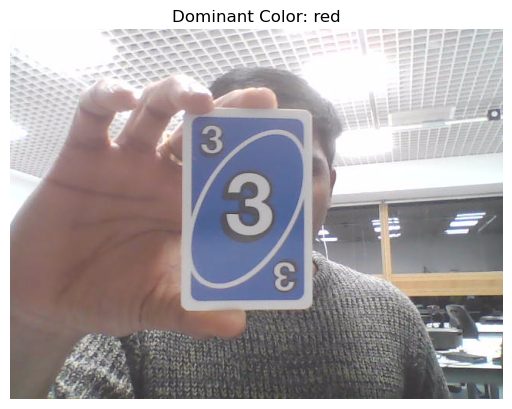

In [19]:
def display_image_with_color(image_path):
    color = detect_hsv_color(image_path)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying
    plt.imshow(img)
    plt.title(f"Dominant Color: {color}")
    plt.axis('off')
    plt.show()

# Example of using the function
image_path = 'C:/cards/3/1.png'
display_image_with_color(image_path)